In [1]:
import tensorflow as tf
tf.config.threading.set_intra_op_parallelism_threads(6)
tf.config.threading.set_inter_op_parallelism_threads(6)


2024-01-27 13:39:50.881732: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 13:39:50.909950: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-27 13:39:50.910380: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-27 13:39:51.517373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [2]:
# download_url = [
#     "https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip"
# ]

# for i in download_url:
#     os.system("wget --no-check-certificate -P /mnt/Data/Data/EEG_Converted "+i)

In [5]:


from tensorflow import keras
from keras import layers
import time

dataset = []
labels = []
multigrasp_dataset = []
reaching_dataset = []
twist_dataset = []
for filename in os.listdir('/mnt/Data/Data/EEG_Converted'):
    if 'MI' in filename:
        filepath = os.path.join('/mnt/Data/Data/EEG_Converted', filename)
        data = scipy.io.loadmat(filepath)
        data.pop('__header__')
        data.pop('__version__')
        data.pop('__globals__')
        data.pop('mrk')
        data.pop('mnt')
        data.pop('nfo')
        data.pop('dat')
        
        data_arr = np.array(data['ch15'])
        for ch in range(16, 19):
            data_arr = np.concatenate((data_arr, data['ch'+str(ch)]), axis=1)
        for ch in range(43, 46):
            data_arr = np.concatenate((data_arr, data['ch'+str(ch)]), axis=1)
        data_arr = data_arr.T
        if 'multigrasp_MI' in filename:
            multigrasp_dataset.append(data_arr)
        if 'reaching_MI' in filename:
            reaching_dataset.append(data_arr)
        if 'twist_MI' in filename:
            twist_dataset.append(data_arr)



In [6]:
# min_multigrasp_len = min([multigrasp_dataset[i].shape for i in range(len(multigrasp_dataset))])
# min_reaching_len = min([reaching_dataset[i].shape for i in range(len(reaching_dataset))])
# min_twist_len = min([twist_dataset[i].shape for i in range(len(twist_dataset))])
#print(min_multigrasp_len,min_reaching_len,min_twist_len)
def minimum_len(dataset):
    return min([dataset[i].shape for i in range(len(dataset))])

In [7]:
def read_data(dataset):
    for i in range(len(dataset)):
        dataset[i] = np.resize(dataset[i],minimum_len(dataset))
        d = dataset[i].astype(float)
        dataset[i] = mne.filter.filter_data(d, l_freq=0.1, h_freq=50,sfreq=2500)
        print(d.shape)
        
    dataset = np.array(dataset)
    print(dataset.shape)
    return dataset


In [8]:

#chan_names = ['Fp1','AF7','AF3','AFz','F7','F5','F3','F1','Fz','FT7','FC5','FC3','FC1','T7','C5','C3','C1','Cz','TP7','CP5','CP3','CP1','CPz','P7','P5','P3','P1','Pz','PO7','PO3','POz','Fp2','AF4','AF8','F2','F4','F6','F8','FC2','FC4','FC6','FT8','C2','C4','C6','T8','CP2','CP4','CP6','TP8','P2','P4','P6','P8','PO4','PO8','O1','Oz','O2','Iz']
chan_names = ['C5','C3','C1','Cz','C2','C4','C6']
info = mne.create_info(ch_names=chan_names, ch_types=['eeg']*7, sfreq=2500)
info.set_montage('standard_1020')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: C5, C3, C1, Cz, C2, C4, C6
 chs: 7 EEG
 custom_ref_applied: False
 dig: 10 items (3 Cardinal, 7 EEG)
 highpass: 0.0 Hz
 lowpass: 1250.0 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 2500.0 Hz
>


In [9]:
%%capture

multigrasp_epochs = mne.EpochsArray(data=read_data(multigrasp_dataset), info=info)
reaching_epochs = mne.EpochsArray(data=read_data(reaching_dataset), info=info)
twist_epochs = mne.EpochsArray(data=read_data(twist_dataset), info=info)

In [ ]:
import matplotlib
from mne.time_frequency import tfr_morlet
%matplotlib inline
# print(len(multigrasp_dataset))
# print(len(reaching_dataset))
# print(len(twist_dataset))



# for i in range(10):
#     print("________________________________ ",i+1)
#     d = multigrasp_epochs.get_data()[i]
#     theta = mne.filter.filter_data(d, sfreq=2500, l_freq=4, h_freq=8,verbose=False)
#     alpha = mne.filter.filter_data(d, sfreq=2500, l_freq=8, h_freq=12,verbose=False)
#     beta = mne.filter.filter_data(d, sfreq=2500, l_freq=12, h_freq=30,verbose=False)
#     delta = mne.filter.filter_data(d, sfreq=2500, l_freq=0.5, h_freq=4,verbose=False)
#     t_evoked = mne.EvokedArray(theta, info, tmin=0)
#     a_evoked = mne.EvokedArray(alpha, info, tmin=0)
#     b_evoked = mne.EvokedArray(beta, info, tmin=0)
#     d_evoked = mne.EvokedArray(delta, info, tmin=0)
#     print("theta")
#     t_evoked.plot()
#     print("alpha")
#     a_evoked.plot()
#     print("beta")
#     b_evoked.plot()
#     print("delta")
#     d_evoked.plot()
    
#     print("________________________________ ")

In [10]:
import scipy.io
import numpy as np
import mne
import os
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

multigrasp_list = []
reaching_list=[]
twist_list = []
multigrasp_list.append(multigrasp_epochs.get_data())
reaching_list.append(reaching_epochs.get_data())
twist_list.append(twist_epochs.get_data())
multigrasp_labels = [0 for i in range(36)] #[0 for i in range(multigrasp_epochs.get_data().shape[0])]
print(multigrasp_labels)

reaching_labels = [1 for i in range(36)]
print(reaching_labels)

twist_labels = [2 for i in range(36)]
print(twist_labels)

label_list = multigrasp_labels + reaching_labels + twist_labels


multigrasp_array = np.vstack(multigrasp_list)
reaching_array = np.vstack(reaching_list)
twist_array = np.vstack(twist_list)

label_array = np.hstack(label_list)

print(label_array.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
(108,)


In [129]:
#Functions for features
from scipy import stats
def mean(x):
    return np.mean(x,axis=-1)

def stddev(x):
    return np.std(x, axis=-1)

def peaktopeak(x):
    return np.ptp(x, axis=-1)

def variance(x):
    return np.var(x, axis=-1)

def mini(x):
    return np.min(x,axis=-1)

def maxi(x):
    return np.max(x,axis=-1)

def argmini(x):
    return np.argmin(x,axis=-1)

def argmaxi(x):
    return np.argmax(x,axis=-1)

def rms(x):
    return np.sqrt(np.mean(x**2,axis=-1))

def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x,axis=-1)),axis=-1)

def skewness(x):
    return stats.skew(x,axis=-1)

def kurtosis(x):
    return stats.kurtosis(x,axis=-1)

def concat_features(x):
    
    #print(mean_f.shape, mean_power.shape, peaktopeak(x).shape,rms(x).shape,abs_diff_signal(x).shape, skewness(x).shape, kurtosis(x).shape)
    return np.concatenate((peaktopeak(x),rms(x),abs_diff_signal(x), skewness(x), kurtosis(x), variance(x),mean(x),stddev(x)),axis=-1)

def featuresarray_load(data_array):
    features = []
    for d in data_array:
        #mean_power = np.mean(p,axis=0)
        #theta = mne.filter.filter_data(d, sfreq=2500, l_freq=4, h_freq=8,verbose=False)
        alpha = mne.filter.filter_data(d, sfreq=2500, l_freq=8, h_freq=12,verbose=False)
        beta = mne.filter.filter_data(d, sfreq=2500, l_freq=12, h_freq=30,verbose=False)
        #delta = mne.filter.filter_data(d, sfreq=2500, l_freq=0.5, h_freq=4,verbose=False)
        alph_ftrs = concat_features(alpha)
        beta_ftrs = concat_features(beta)
        #theta_ftrs = concat_features(theta)    
        #delta_ftrs = concat_features(delta)  
        _,p=scipy.signal.welch(beta, fs=2500,average='median')
        psd_c3 = p[1, :]  
        psd_c4 = p[5, :]  
        res = np.concatenate([alph_ftrs,beta_ftrs],axis=0)
        #print('p',psd_c3.shape)
        res = np.concatenate((res,psd_c3,psd_c4))
        #print(res.shape)
        features.append(res)
    return features

f_mg = np.array(featuresarray_load(multigrasp_array))
f_rch = np.array(featuresarray_load(reaching_array))
f_tw = np.array(featuresarray_load(twist_array))
np.save("m_features_array3.npy",allow_pickle=False,arr=f_mg)
np.save("r_features_array3.npy",allow_pickle=False,arr=f_rch)
np.save("t_features_array3.npy",allow_pickle=False,arr=f_tw)

In [299]:
# import pywt
# from scipy import stats
# from scipy.interpolate import interp1d
# def mean(x):
#     return np.mean(x, axis=-1).reshape(-1, 1)

# def stddev(x):
#     return np.std(x, axis=-1).reshape(-1, 1)

# def peaktopeak(x):
#     return np.ptp(x, axis=-1).reshape(-1, 1)

# def variance(x):
#     return np.var(x, axis=-1).reshape(-1, 1)

# def mini(x):
#     return np.min(x, axis=-1).reshape(-1, 1)

# def maxi(x):
#     return np.max(x, axis=-1).reshape(-1, 1)

# def argmini(x):
#     return np.argmin(x, axis=-1).reshape(-1, 1)

# def argmaxi(x):
#     return np.argmax(x, axis=-1).reshape(-1, 1)

# def rms(x):
#     return np.sqrt(np.mean(x**2, axis=-1)).reshape(-1, 1)

# def abs_diff_signal(x):
#     return np.sum(np.abs(np.diff(x, axis=-1)), axis=-1).reshape(-1, 1)

# def skewness(x):
#     return stats.skew(x, axis=-1).reshape(-1, 1)

# def kurtosis(x):
#     return stats.kurtosis(x, axis=-1).reshape(-1, 1)

# def concat_features(x):
#     features = np.concatenate(
#         (
#             peaktopeak(x),
#             rms(x),
#             abs_diff_signal(x),
#             skewness(x),
#             kurtosis(x),
#             variance(x),
#             mean(x),
#             stddev(x)
#         ),
#         axis=1
#     )
#     return features

# def featuresarray_load(data_array):
#     features = []
#     for d in data_array:
#         alpha = mne.filter.filter_data(d, sfreq=2500, l_freq=8, h_freq=12, verbose=False)
#         beta = mne.filter.filter_data(d, sfreq=2500, l_freq=12, h_freq=30, verbose=False)

        
#         alph_ftrs = concat_features(alpha)  
#         beta_ftrs = concat_features(beta)  
#         print(alph_ftrs.shape)
       
#         _, psd = scipy.signal.welch(beta, fs=2500, average='median')  
#         _, psd2 = scipy.signal.welch(alpha, fs=2500, average='median')  
#         print(psd.shape)
        
#         res = np.concatenate([alph_ftrs, beta_ftrs, psd, psd2], axis=1)
#         print(res.shape)
#         features.append(res)
    
#     return features

# f_mg = np.array(featuresarray_load(multigrasp_array))
# f_rch = np.array(featuresarray_load(reaching_array))
# f_tw = np.array(featuresarray_load(twist_array))
# np.save("m_features_array3.npy",allow_pickle=False,arr=f_mg)
# np.save("r_features_array3.npy",allow_pickle=False,arr=f_rch)
# np.save("t_features_array3.npy",allow_pickle=False,arr=f_tw)

In [316]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GroupKFold, GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import matplotlib.pyplot as plt

(108, 370)
370
(86, 370)
(22, 370)
(86,)
(22,)
29 29 28 370


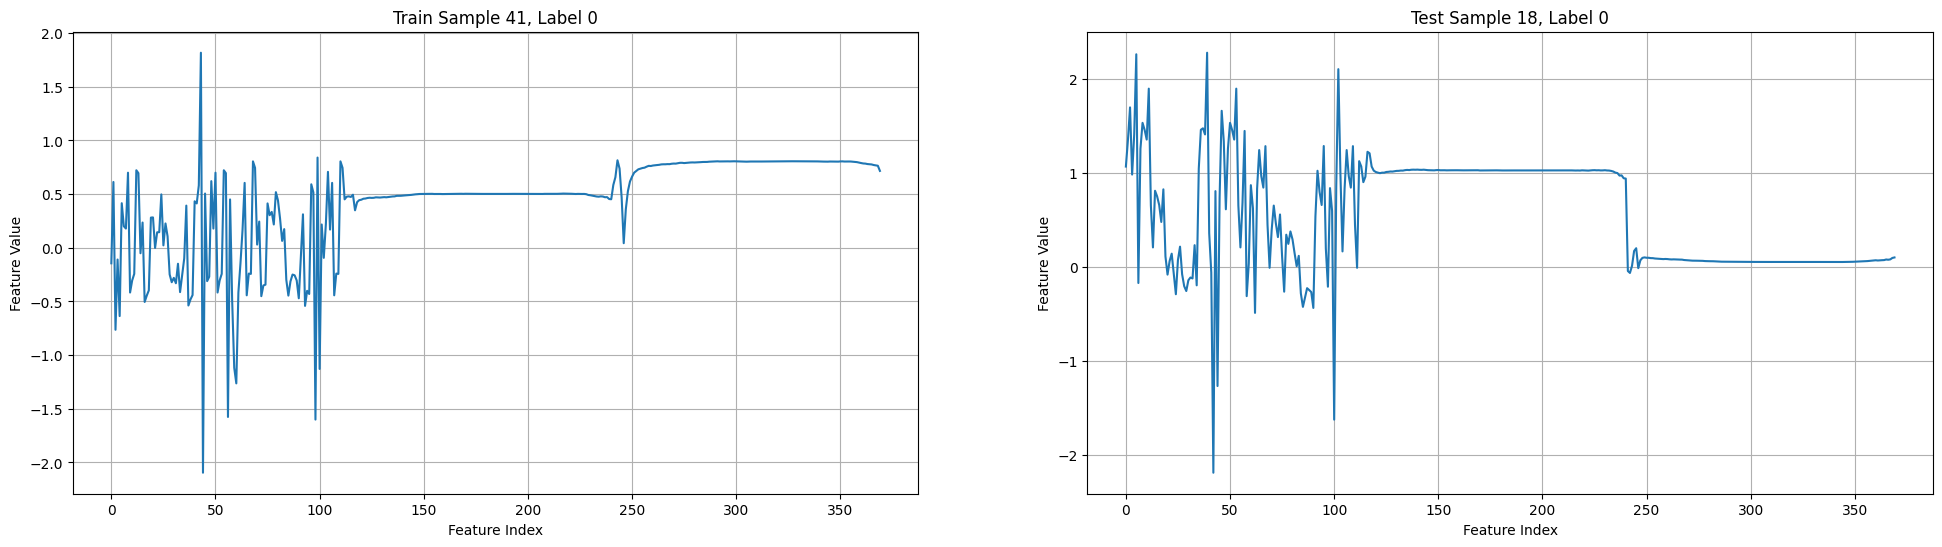

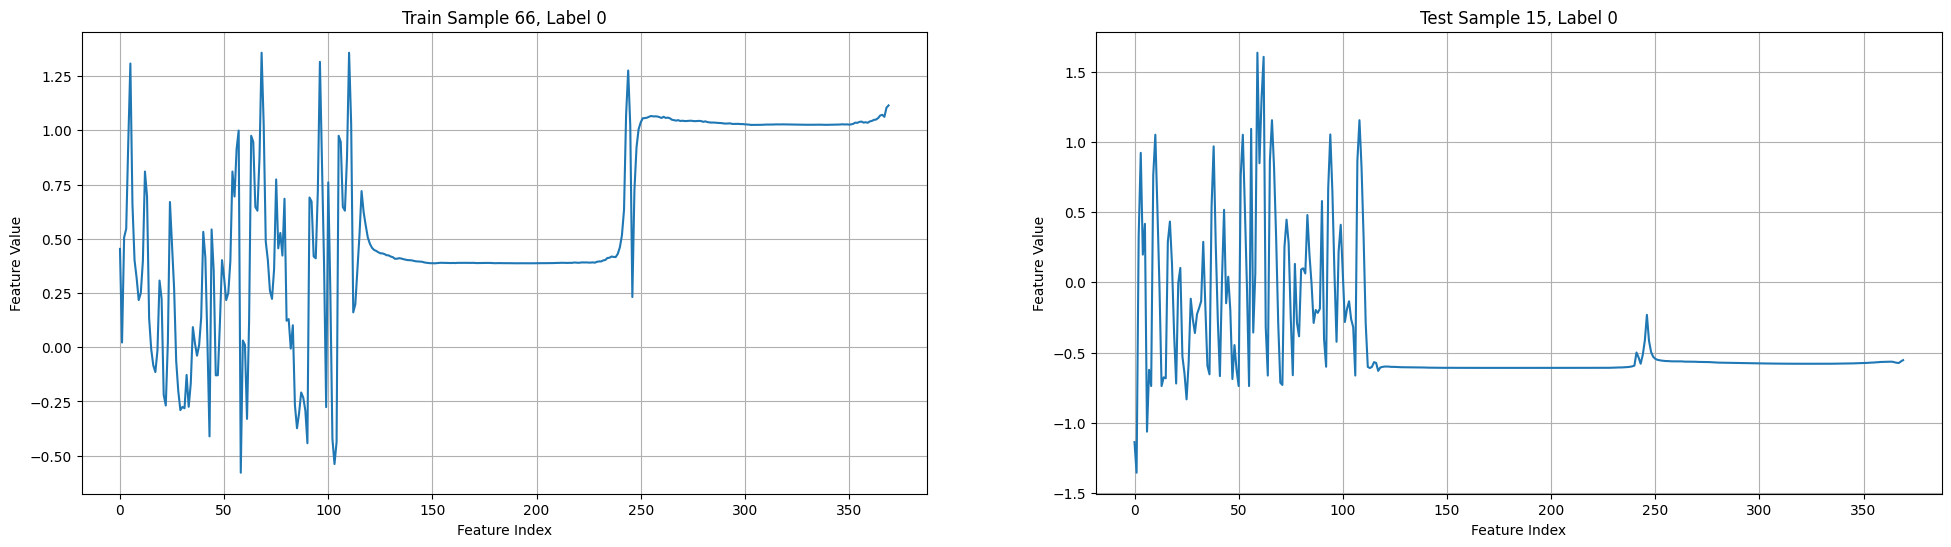

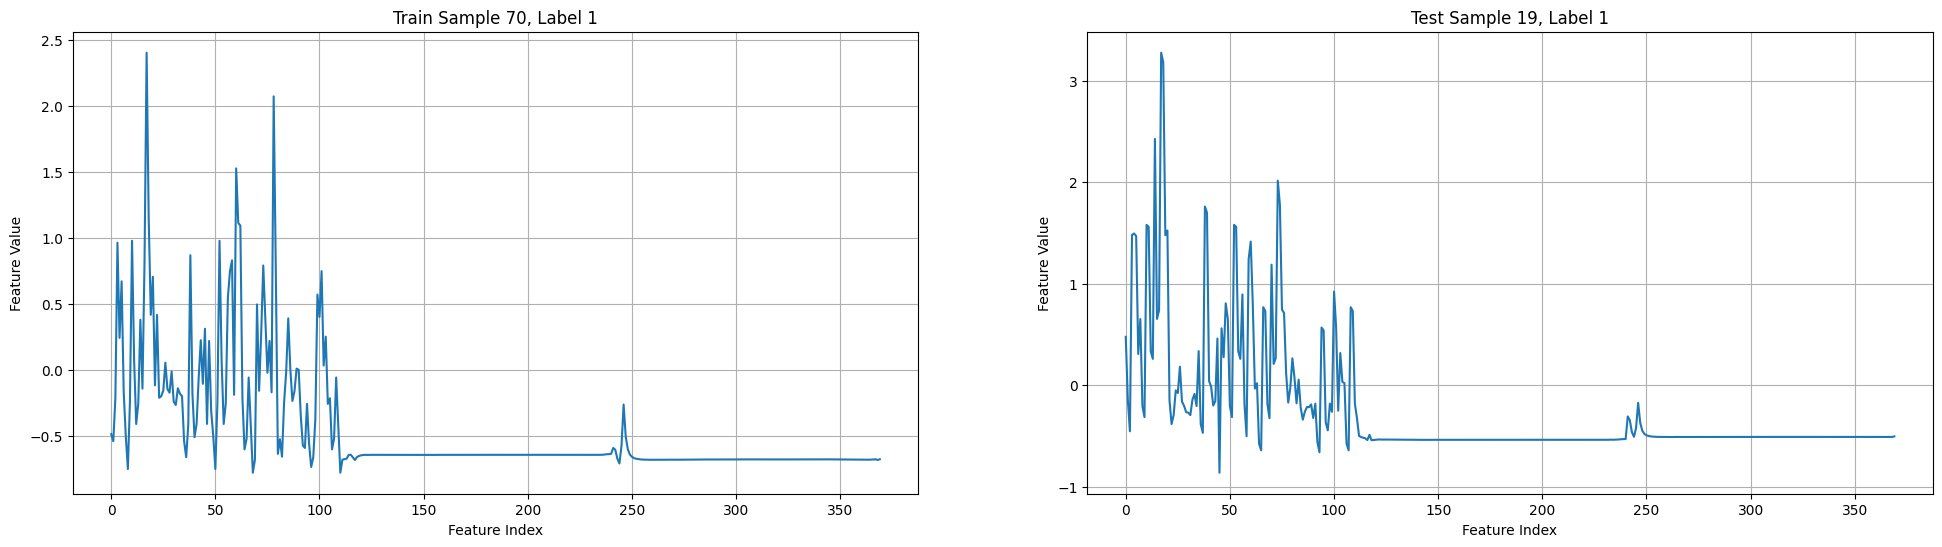

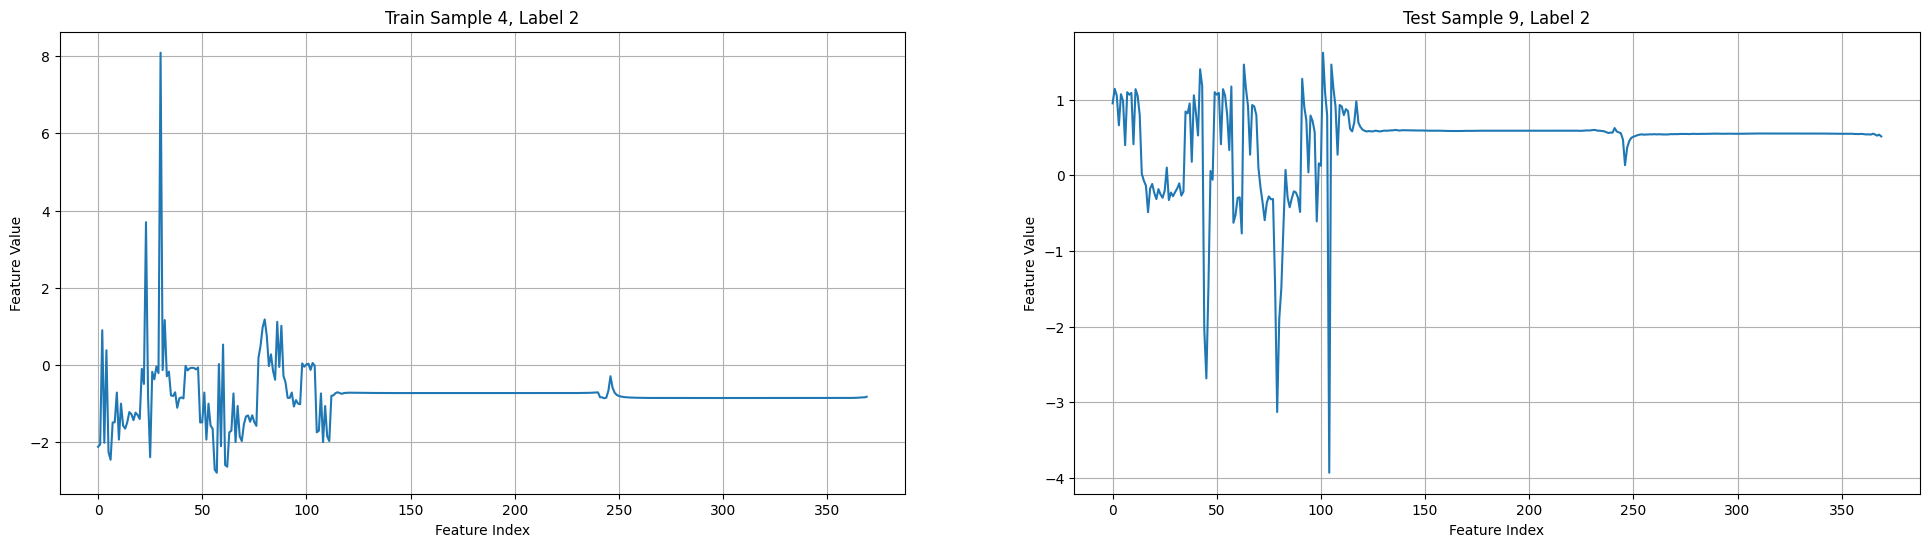

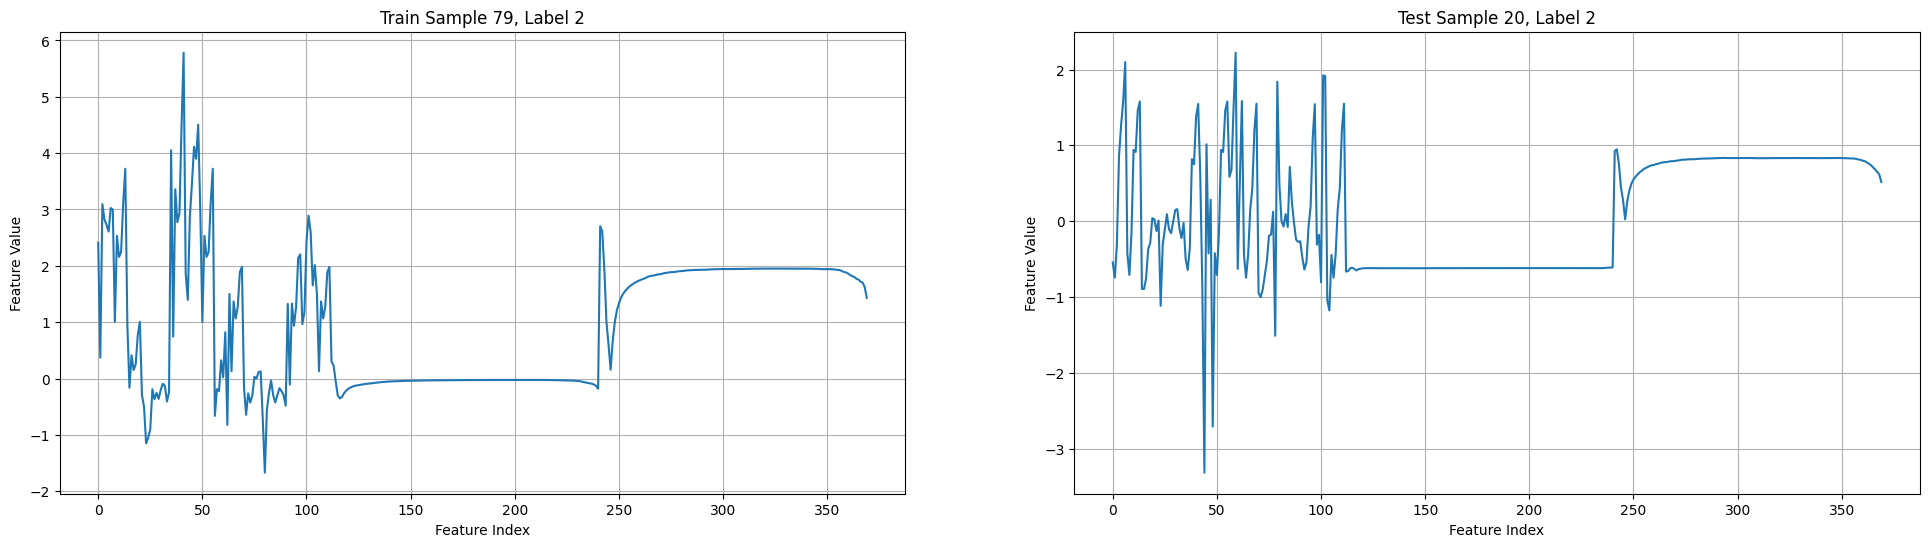

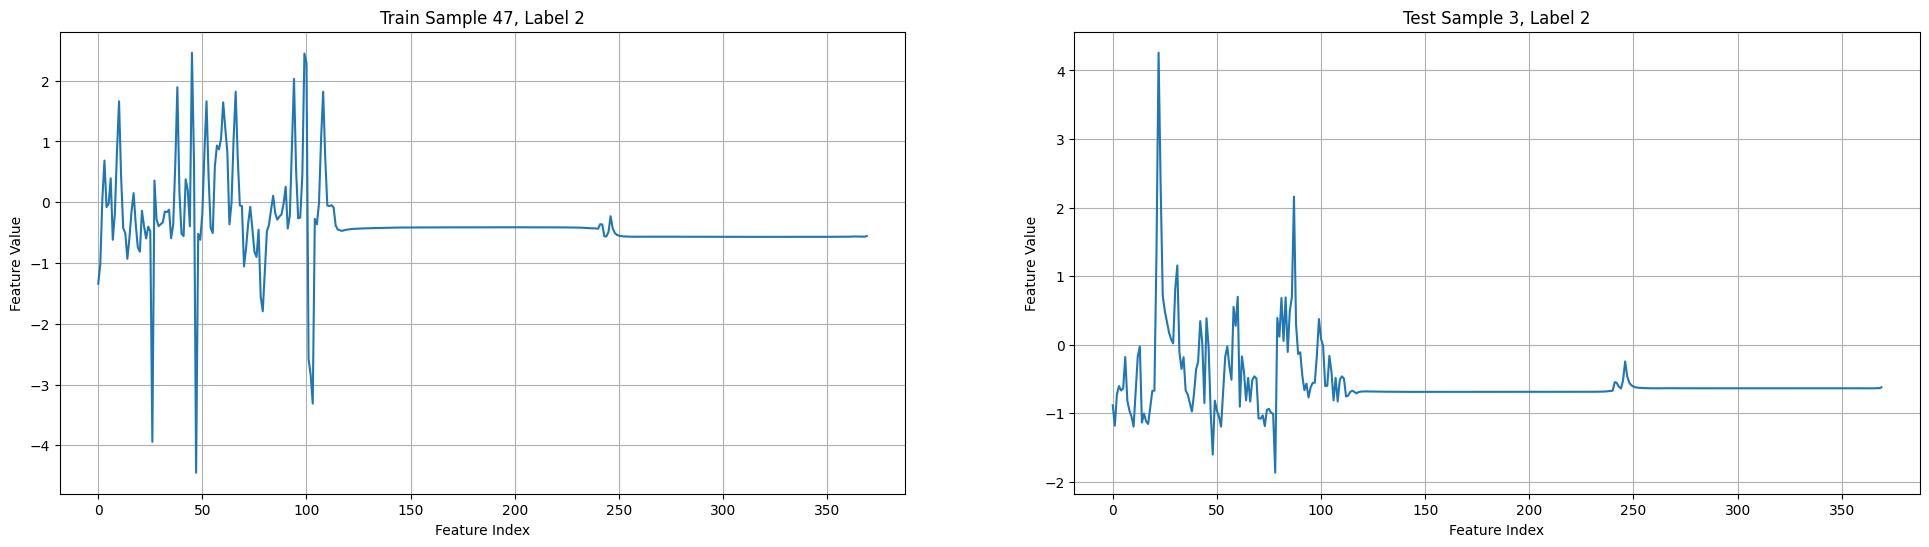

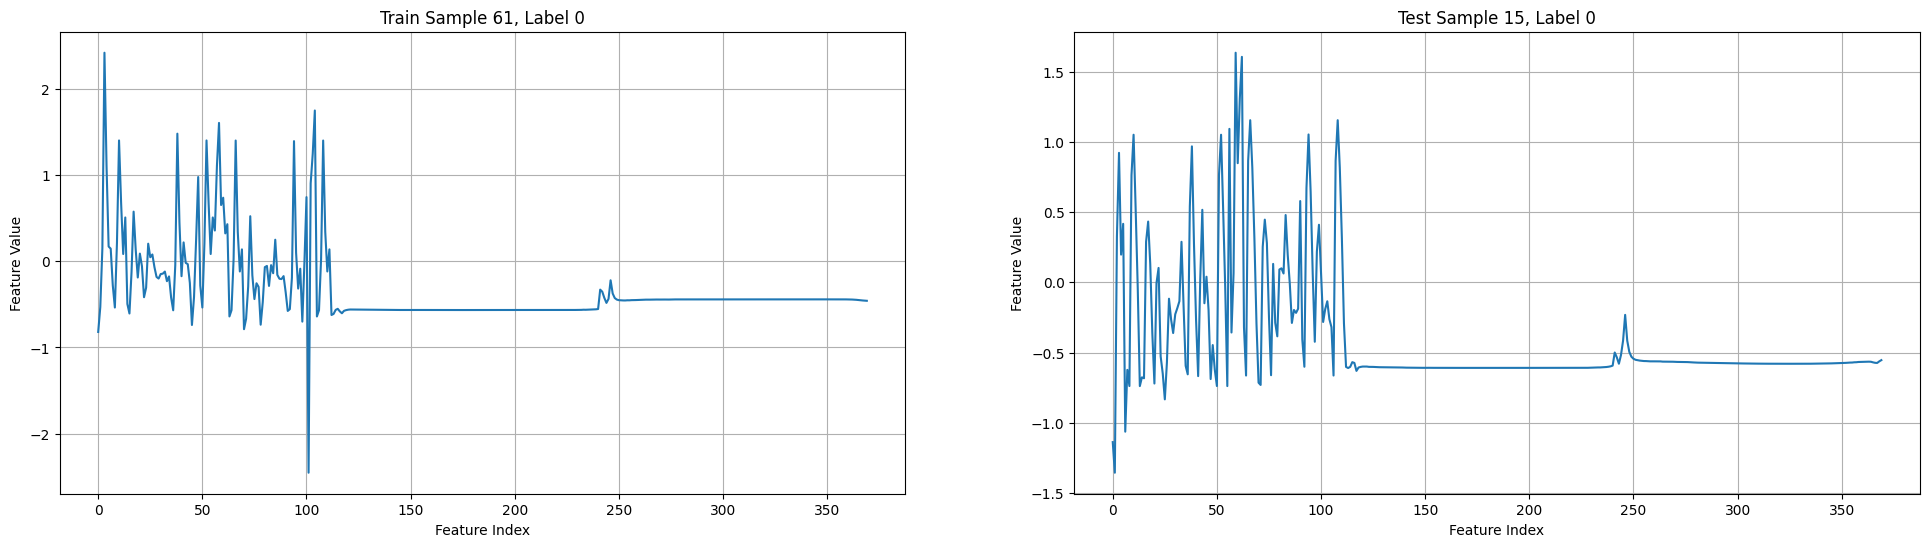

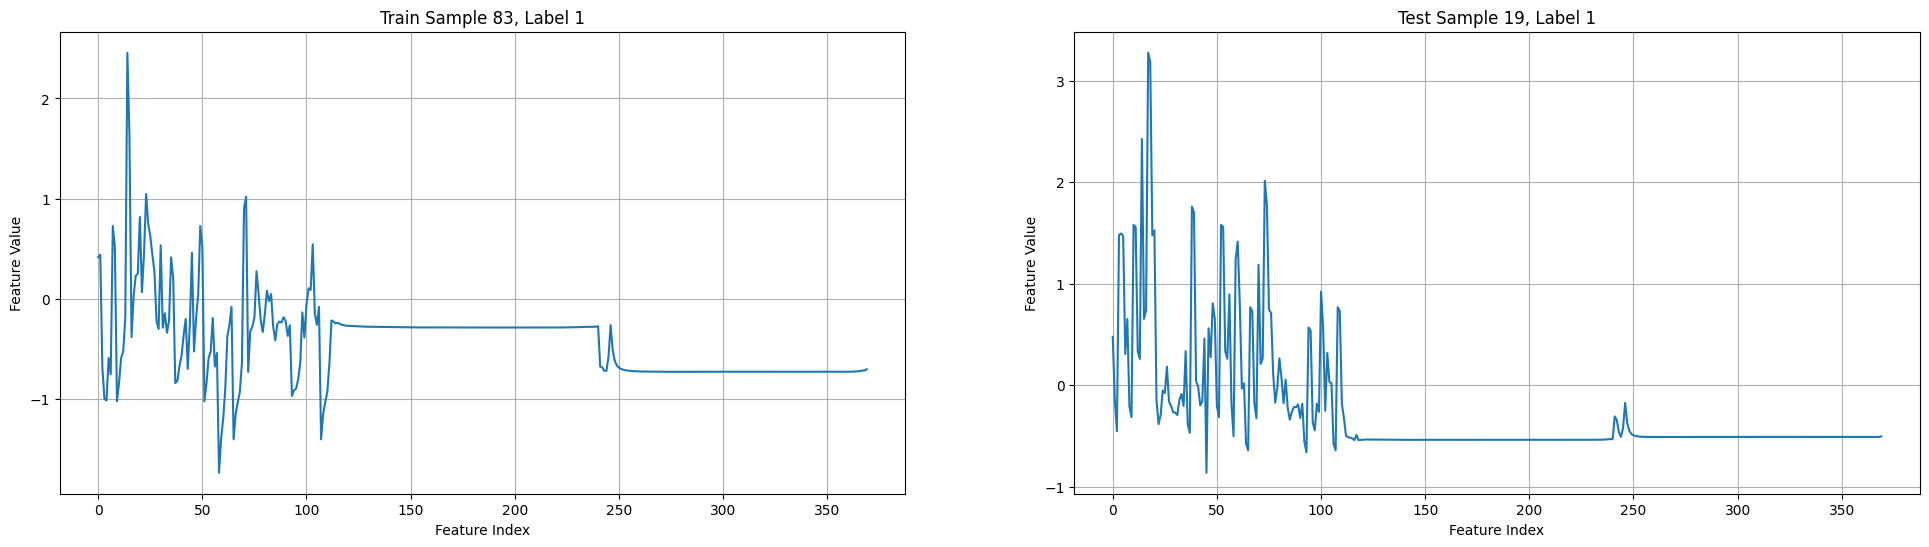

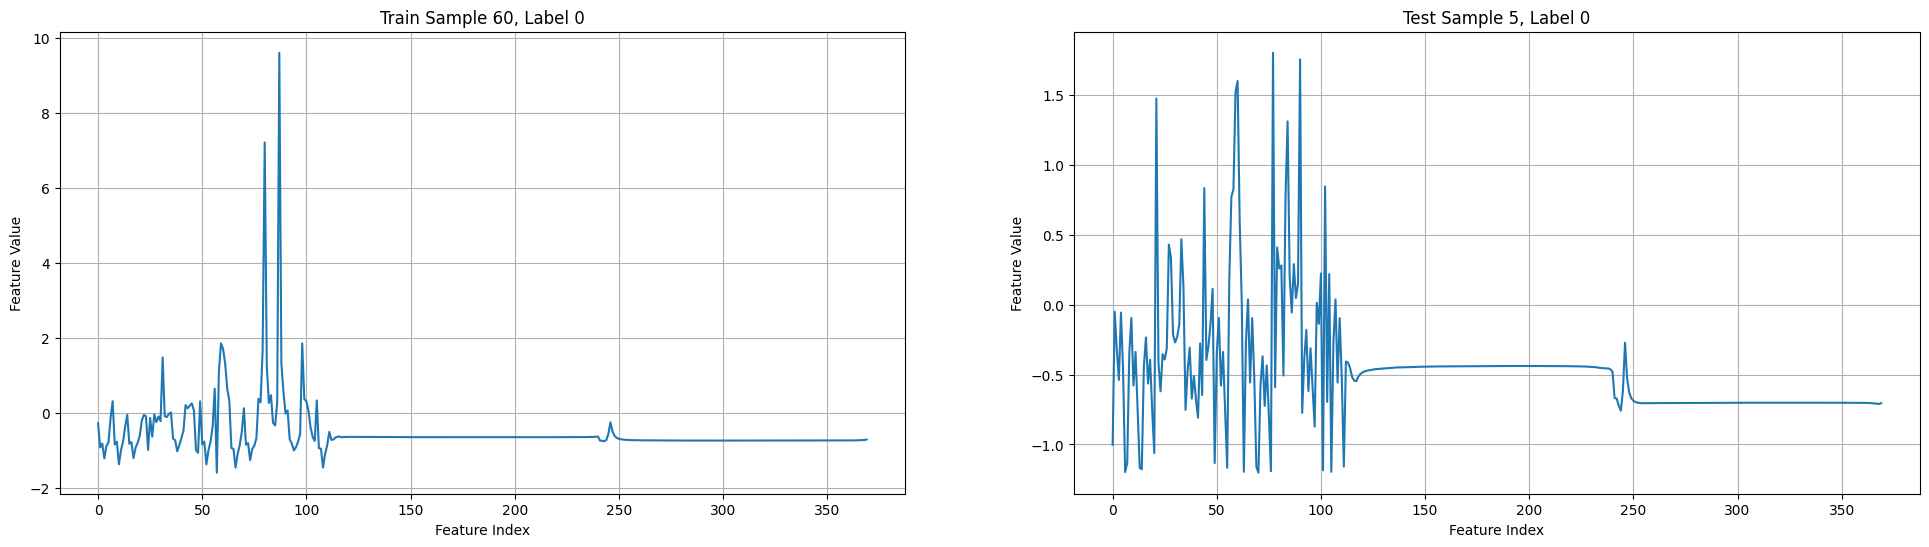

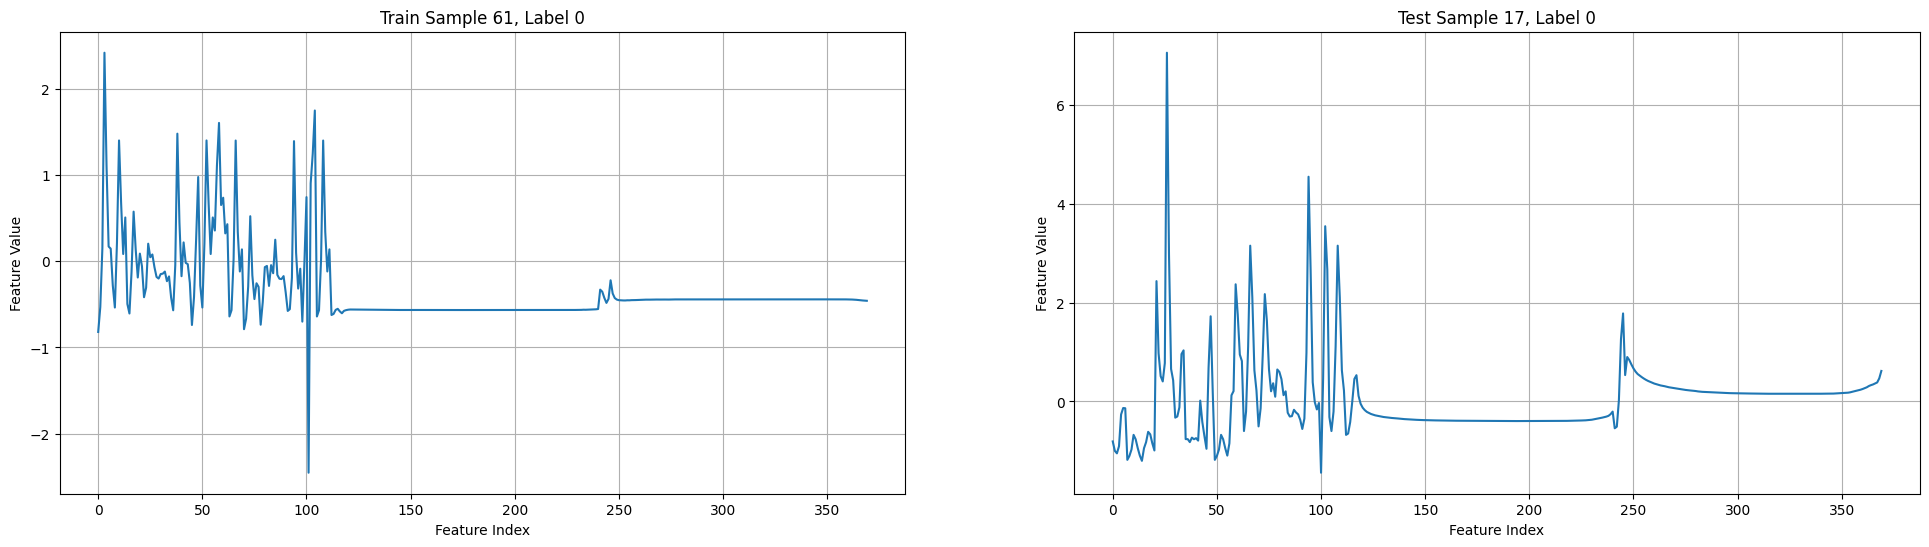

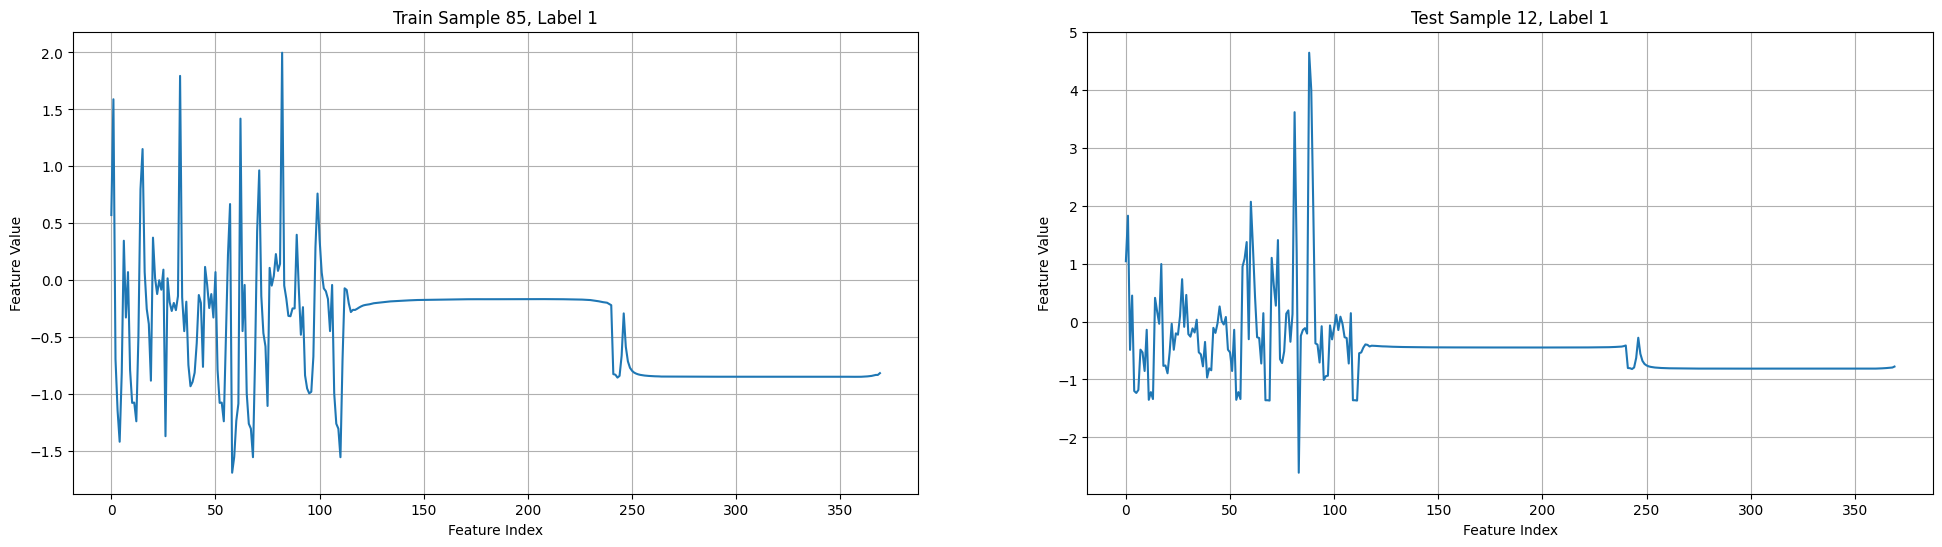

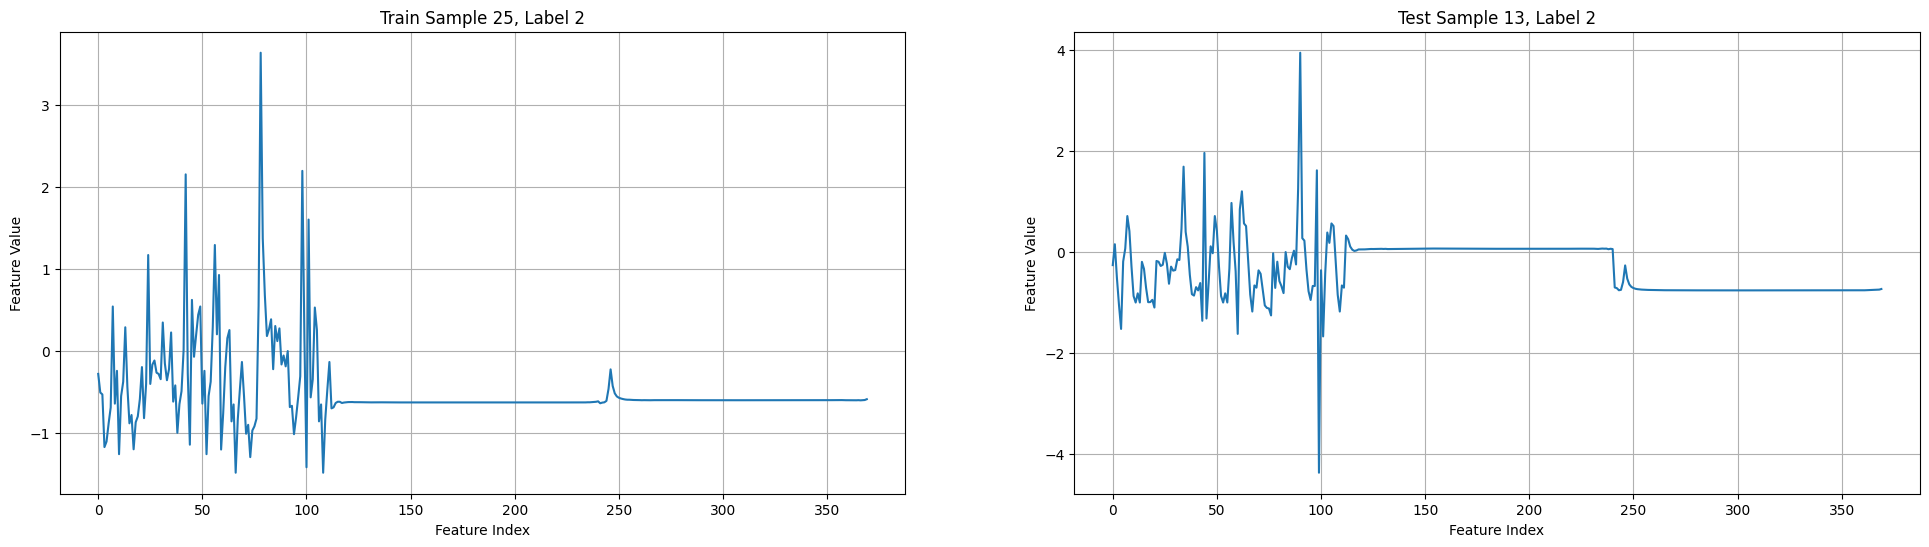

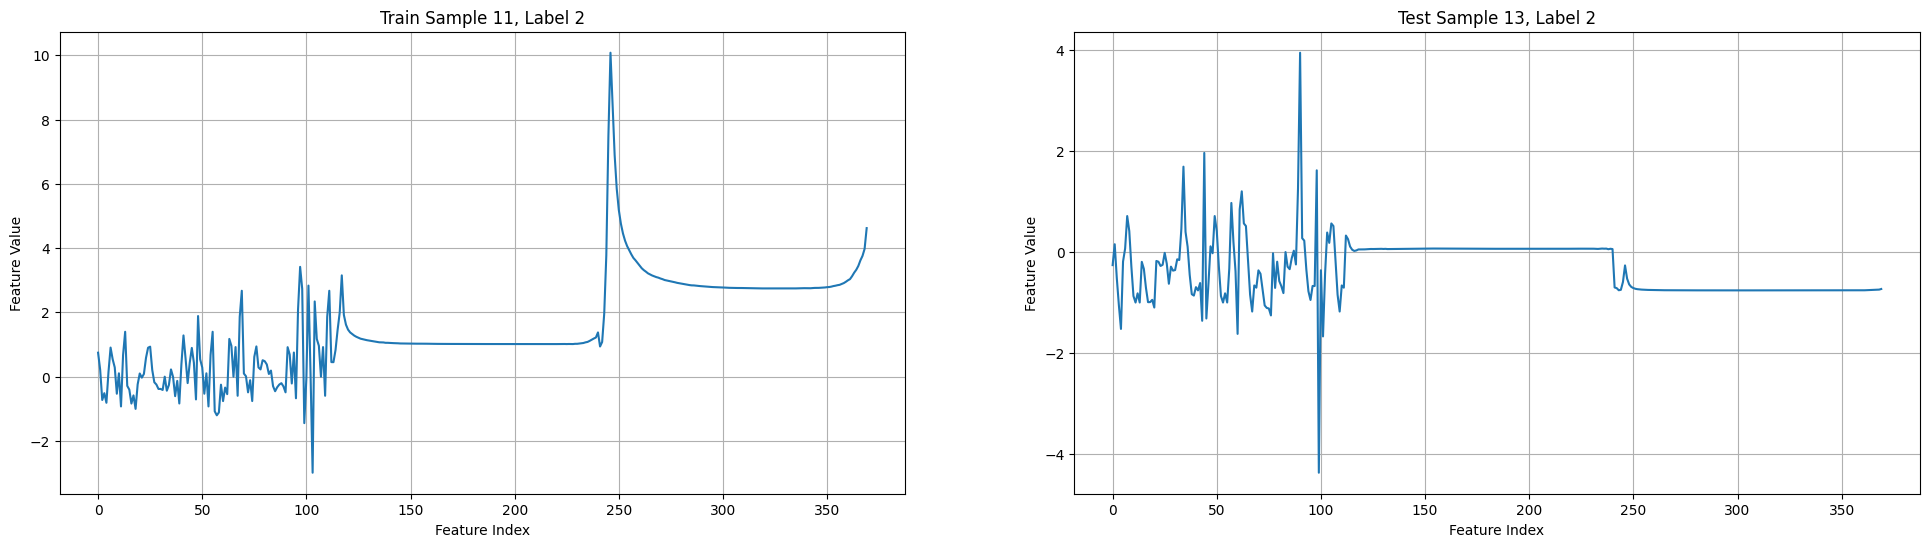

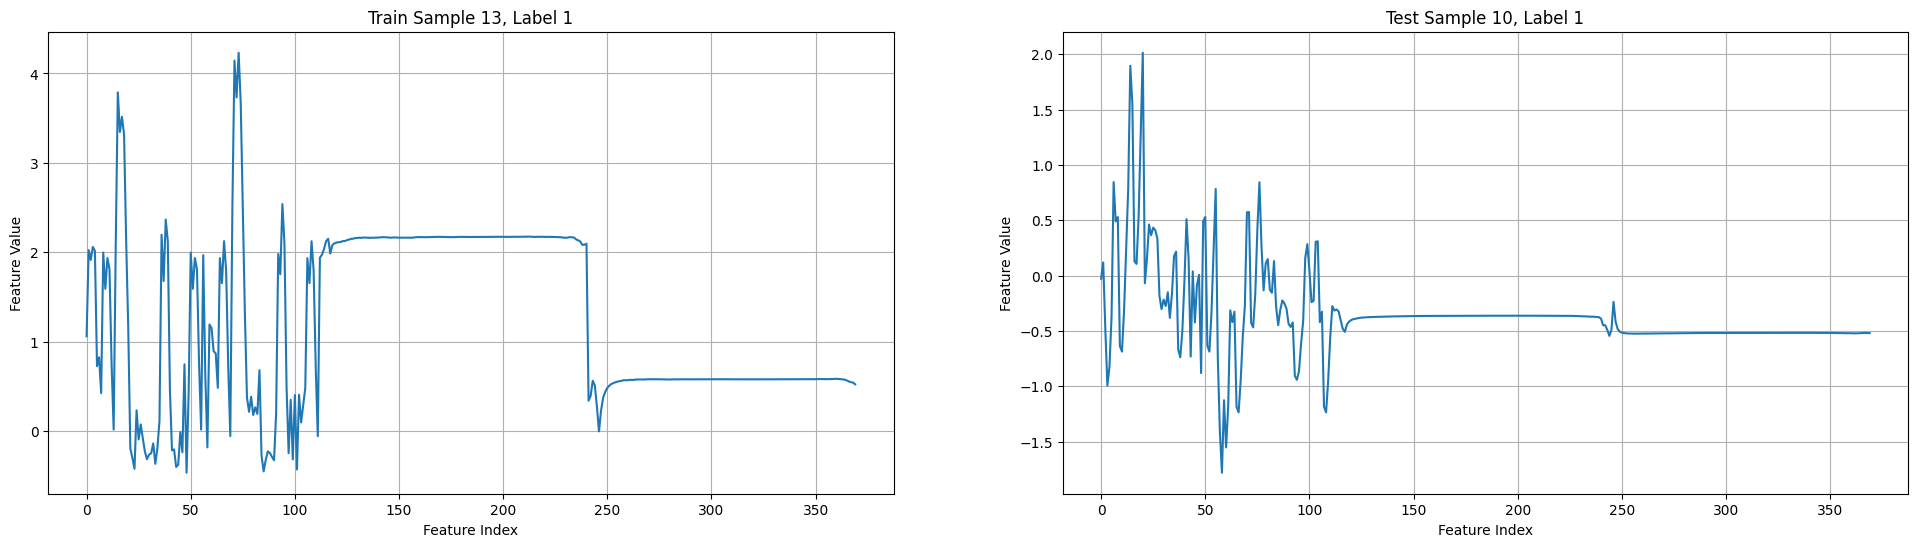

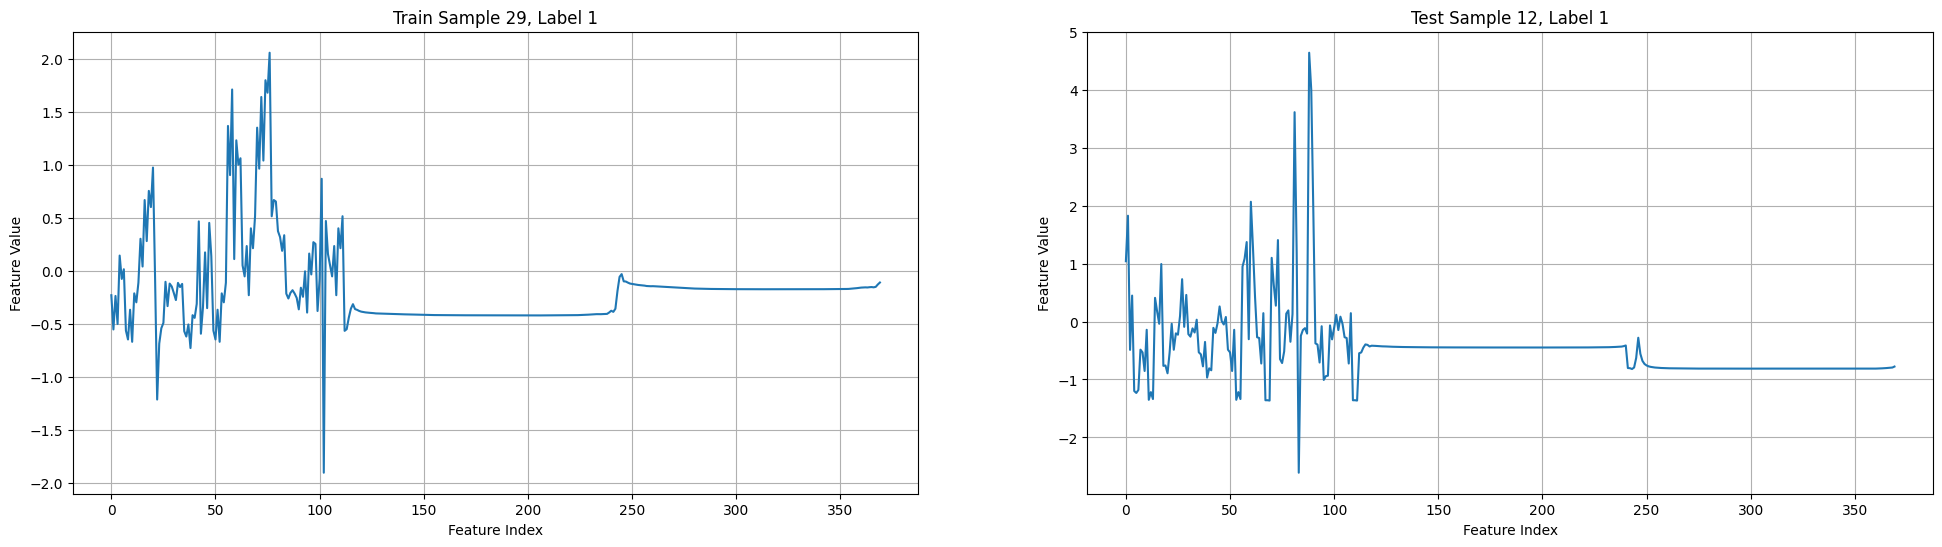

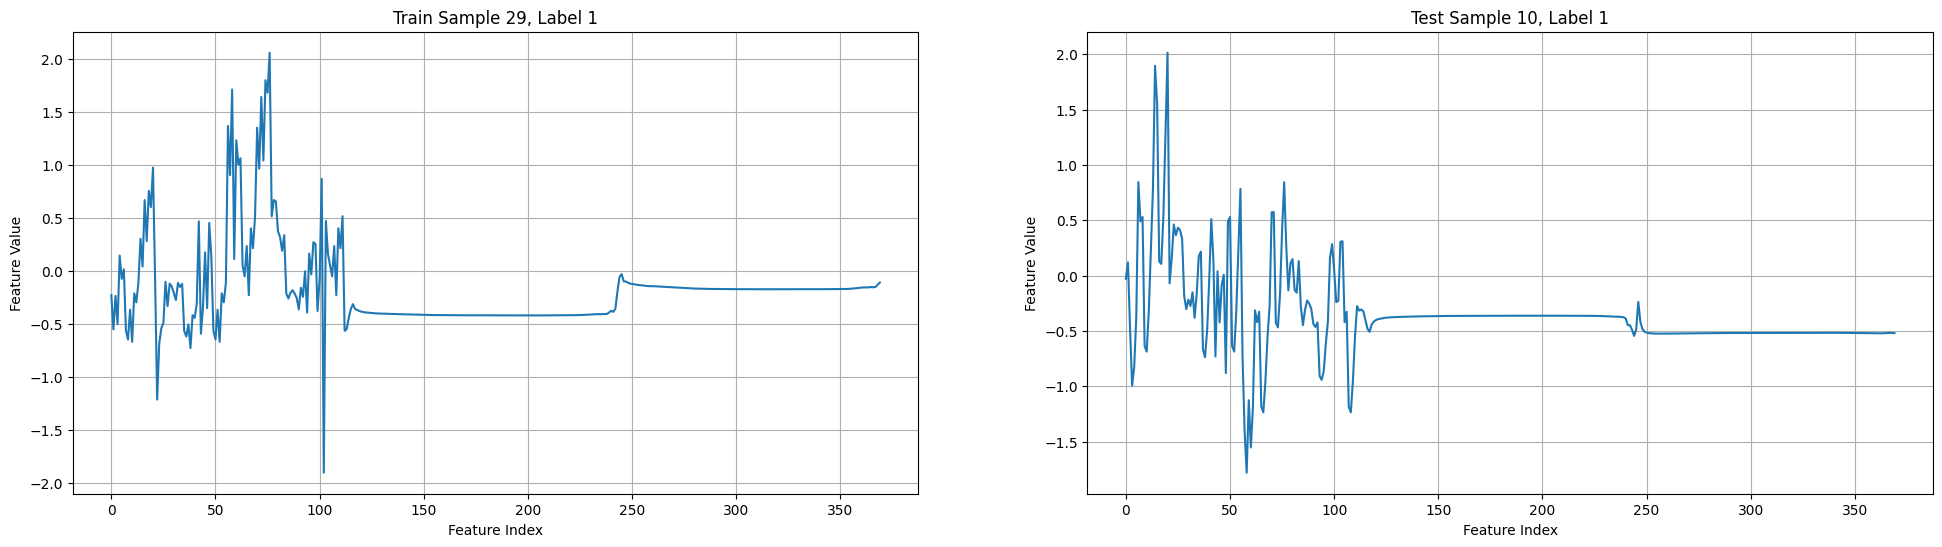

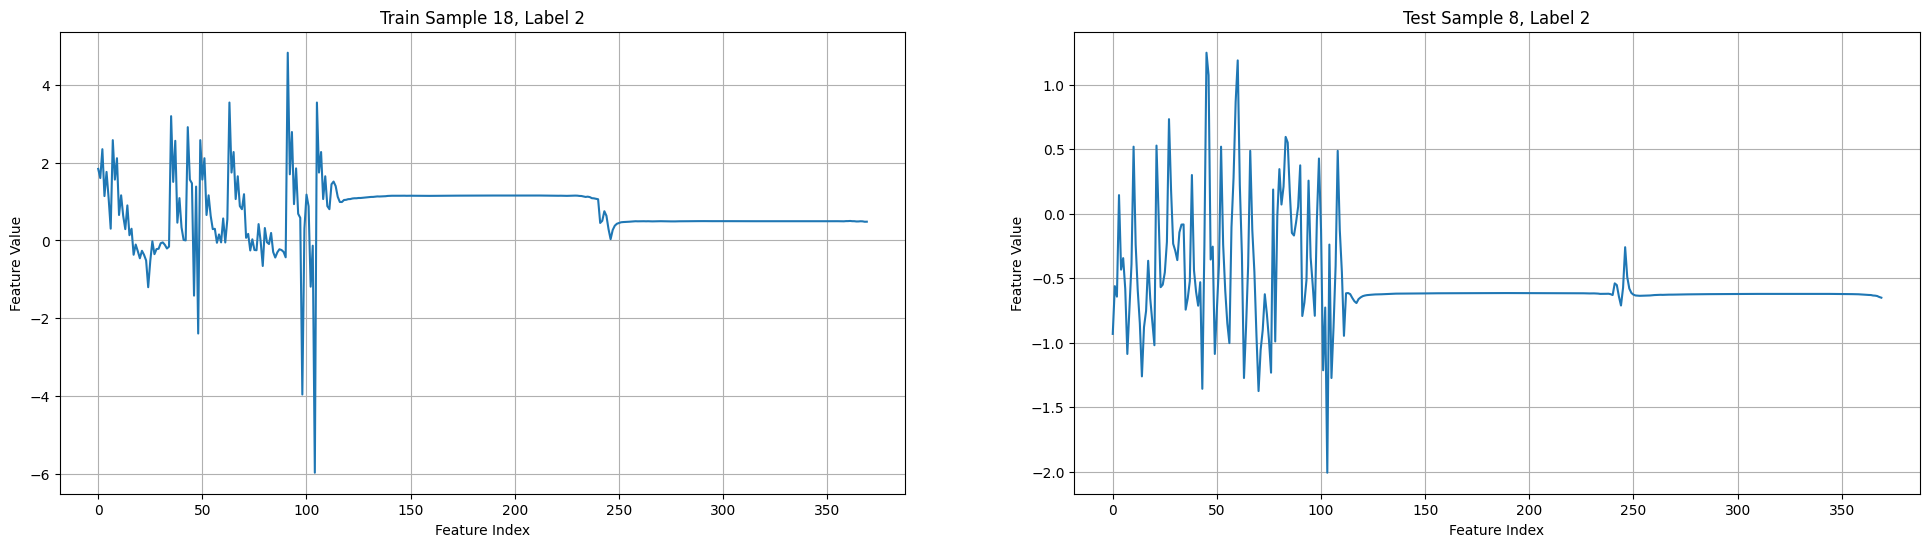

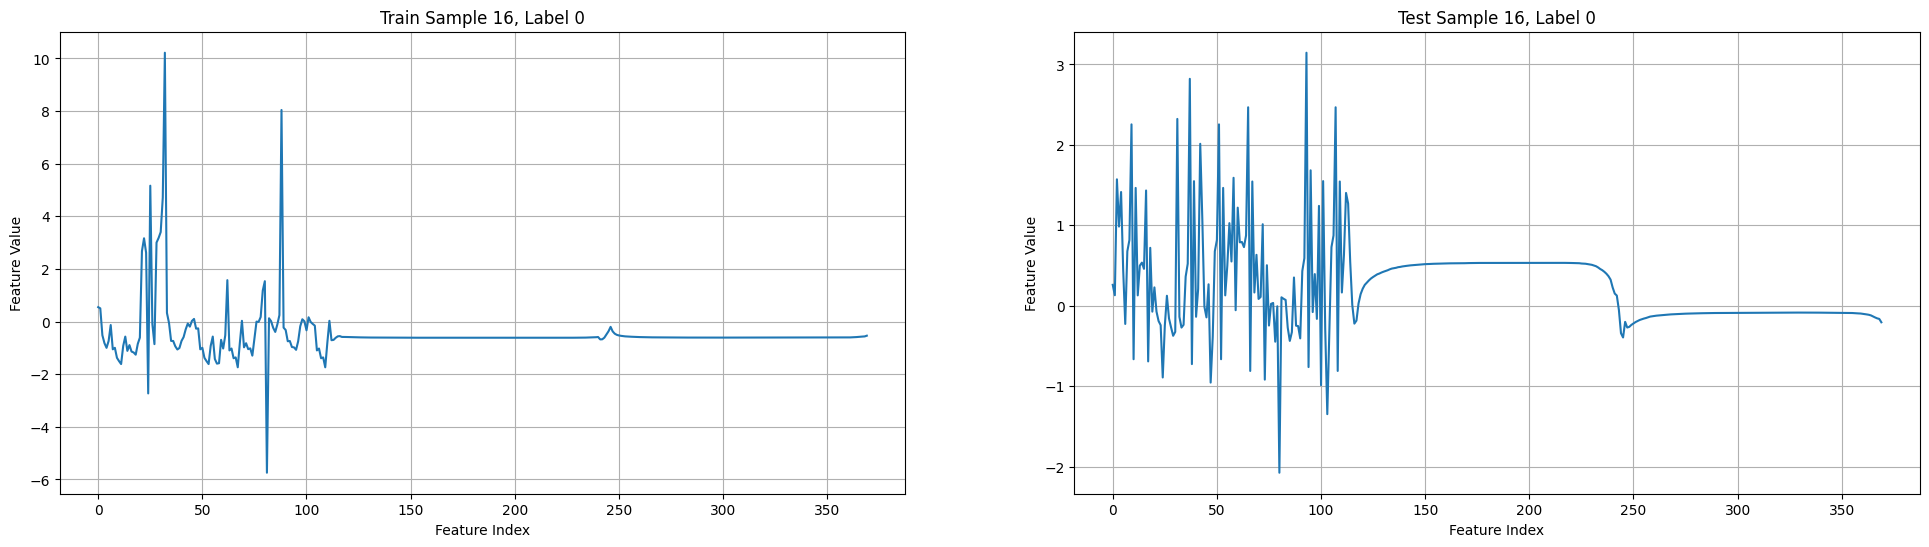

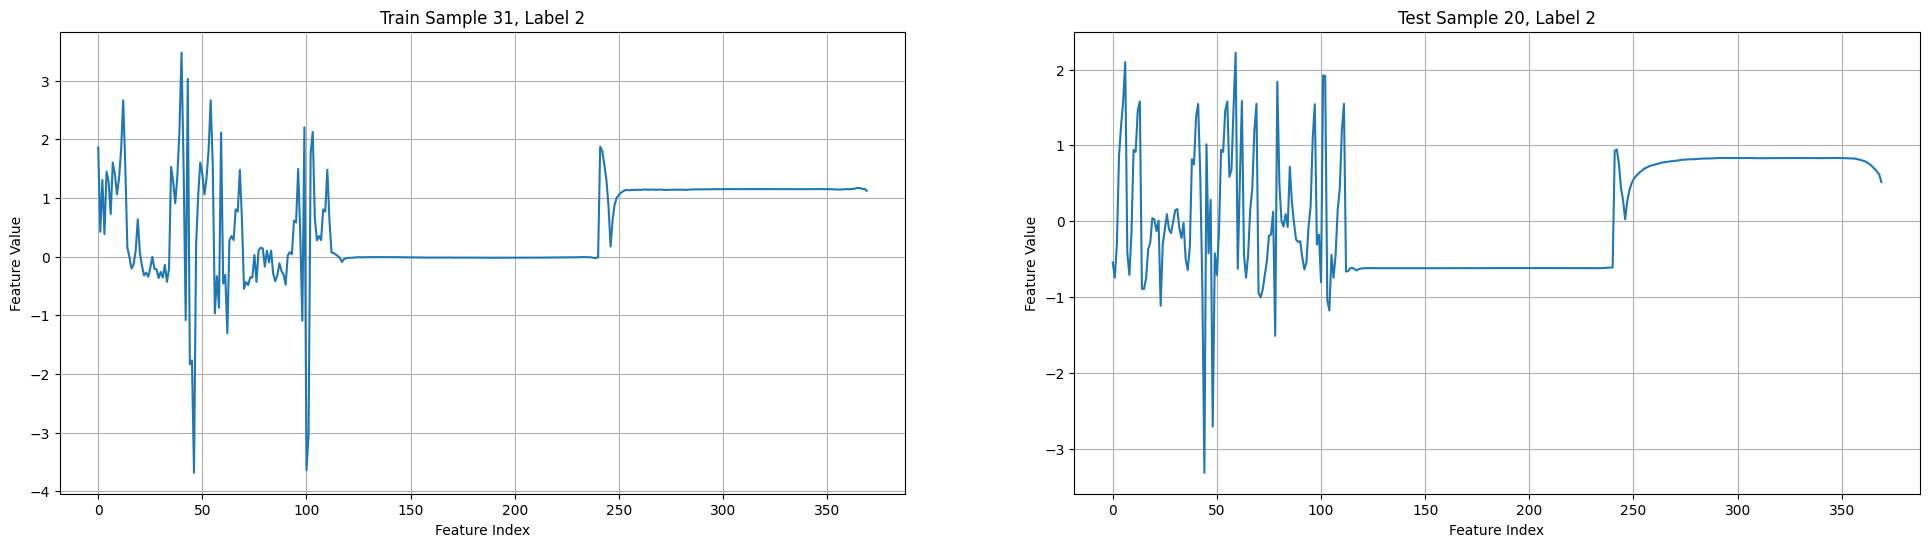

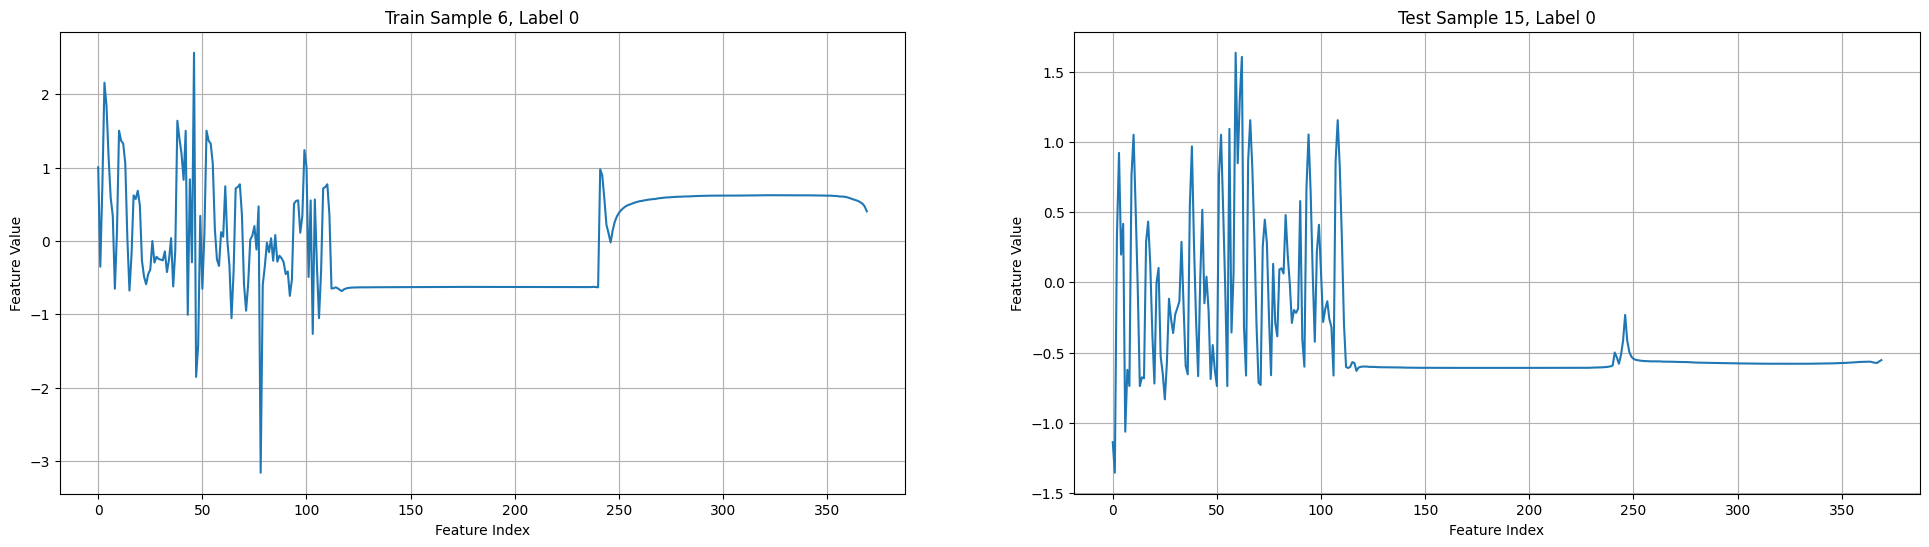

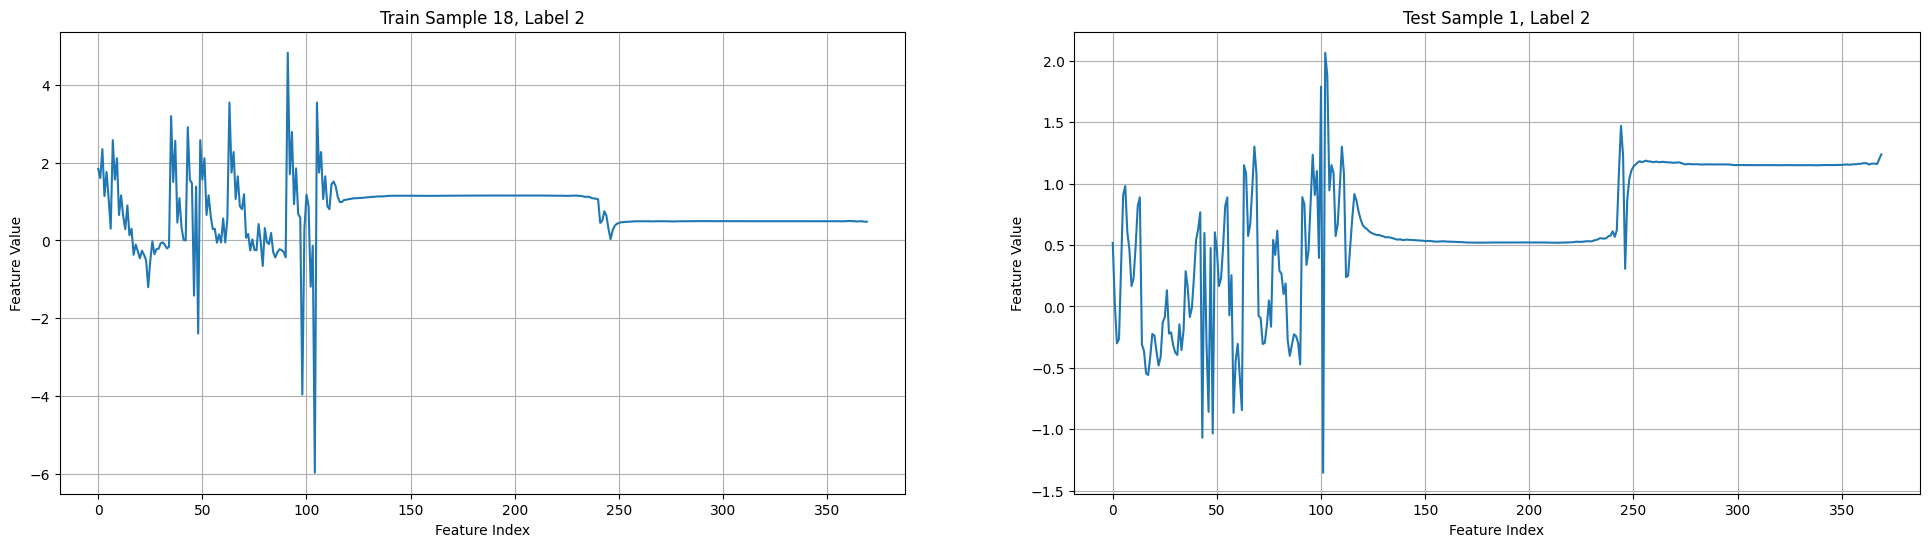

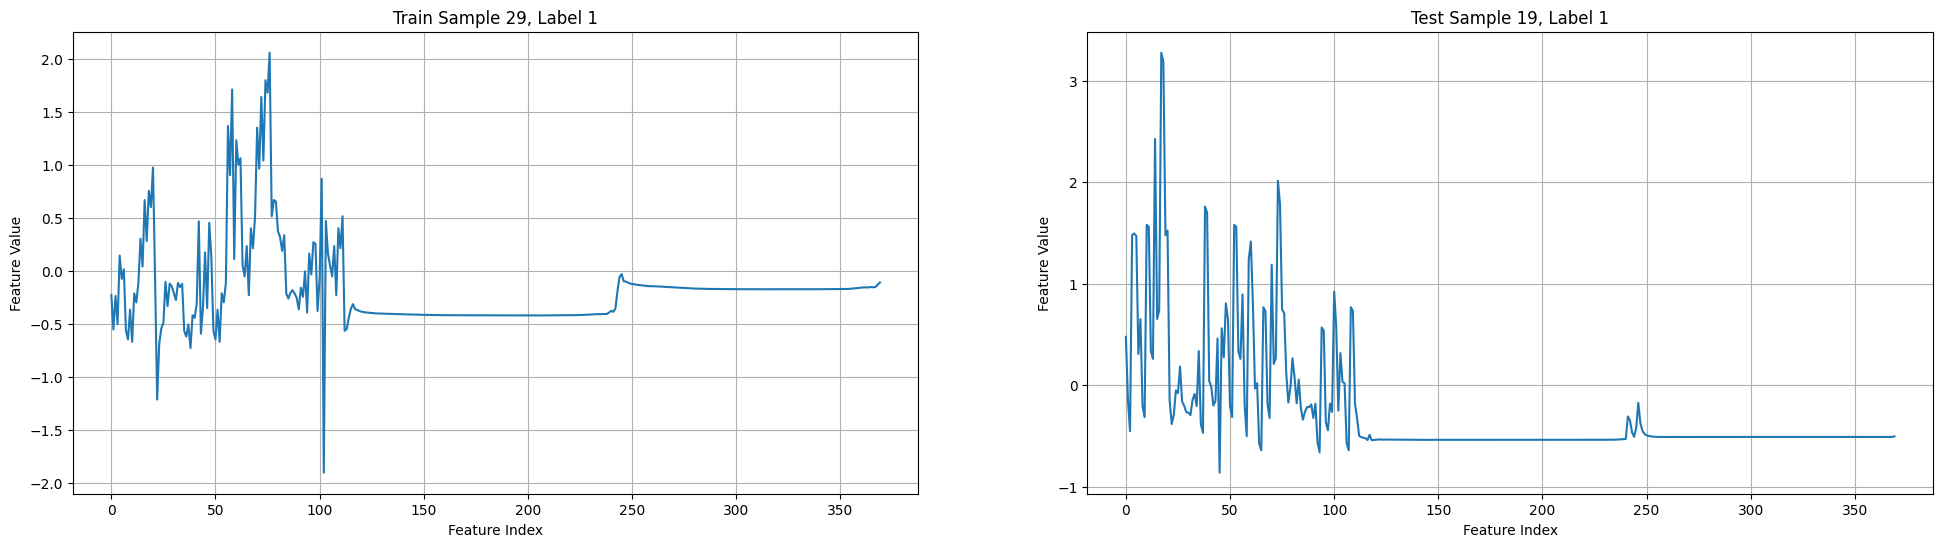

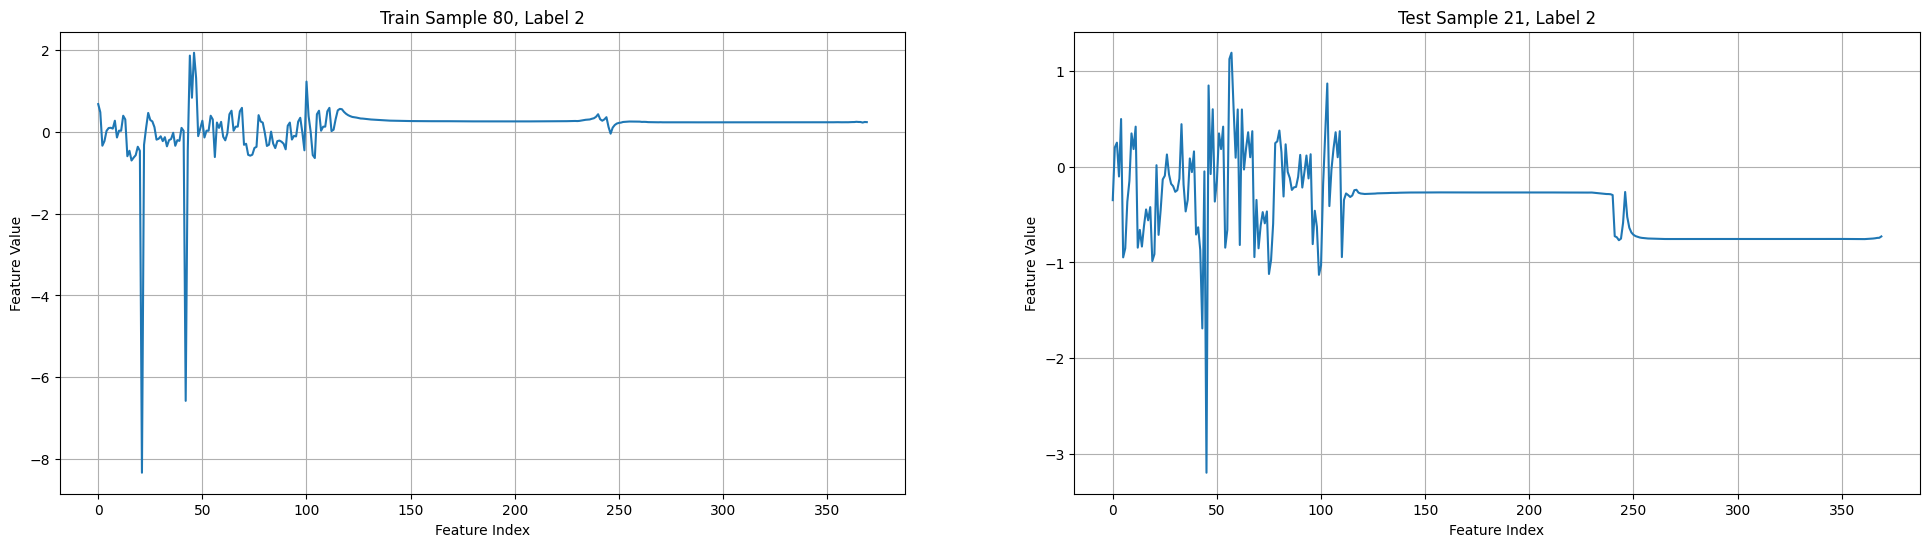

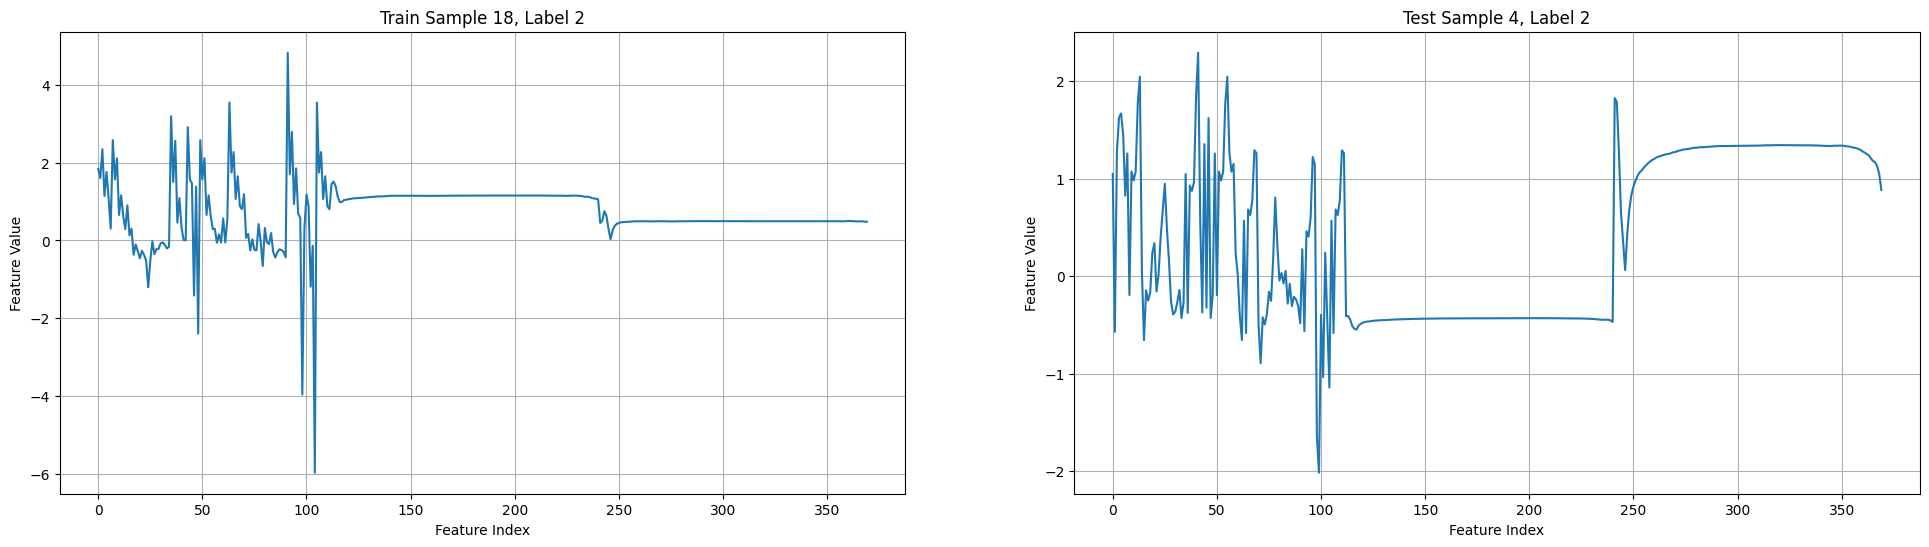

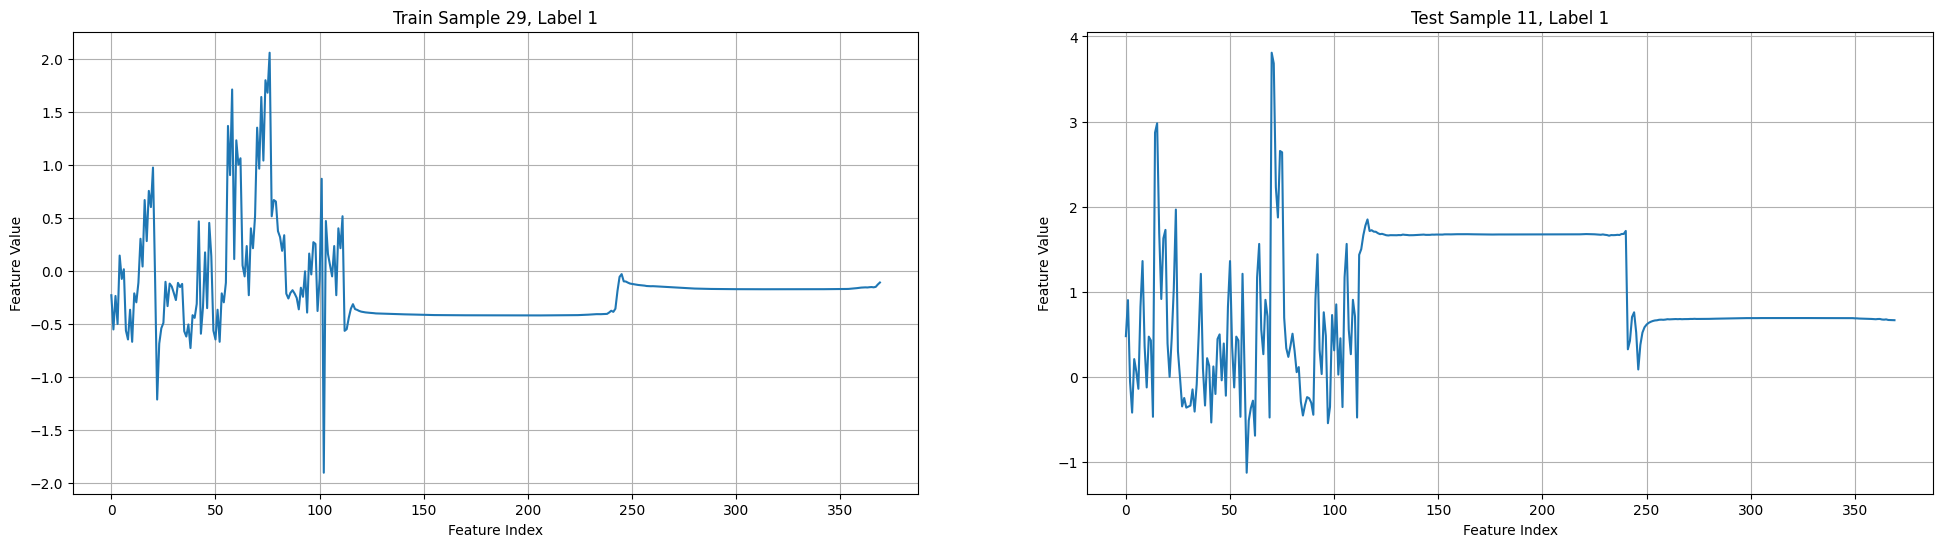

(86, 370)
(22, 370)
(86,)
(22,)
29 29 28 0 370
7 7 8 0 370


In [317]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, LayerNormalization, Reshape
from keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from keras.backend import clear_session
from imblearn.over_sampling import SMOTE

m_features_array = np.load(file="m_features_array3.npy")
r_features_array = np.load(file="r_features_array3.npy")
t_features_array = np.load(file="t_features_array3.npy")
features_array = np.concatenate((m_features_array,r_features_array,t_features_array))
#features_array = features_array.transpose(0,2,1)
print(features_array.shape)
GLOBAL_SHAPE_LENGTH = features_array.shape[1]
print(GLOBAL_SHAPE_LENGTH)

scaler = StandardScaler()
features_array  = scaler.fit_transform(features_array)
X_train, X_test, y_train, y_test = train_test_split(features_array, label_array, test_size=.2, random_state=42, shuffle=True, stratify=label_array)
# X_train = X_train.reshape(X_train.shape[0],GLOBAL_SHAPE_LENGTH[0]*GLOBAL_SHAPE_LENGTH[1])
# X_test = X_test.reshape(X_test.shape[0],GLOBAL_SHAPE_LENGTH[0]*GLOBAL_SHAPE_LENGTH[1])
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train = X_train.reshape(X_train.shape[0],GLOBAL_SHAPE_LENGTH[0],GLOBAL_SHAPE_LENGTH[1])
# X_test = X_test.reshape(X_test.shape[0],GLOBAL_SHAPE_LENGTH[0],GLOBAL_SHAPE_LENGTH[1])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

lst = y_train.tolist()
print(lst.count(0),lst.count(1),lst.count(2),GLOBAL_SHAPE_LENGTH)
# X_train2 = X_train.reshape(X_train.shape[0], GLOBAL_SHAPE_LENGTH, 1)
# X_test2 = X_test.reshape(X_test.shape[0], GLOBAL_SHAPE_LENGTH, 1)
scaler = StandardScaler()
ftr2  = scaler.fit_transform(features_array)

import numpy as np
import matplotlib.pyplot as plt

for _ in range(25):

  sample_index_train = random.randint(0, len(X_train) - 1)
  train_sample = X_train[sample_index_train]
  train_label = y_train[sample_index_train]

  match_indices = np.where(y_test == train_label)[0]
  sample_index_test = random.choice(match_indices)
  test_sample = X_test[sample_index_test]


  feature_axis = np.arange(len(train_sample))


  plt.figure(figsize=(24, 6))

  # Plot train sample
  plt.subplot(1, 2, 1)
  plt.plot(feature_axis, train_sample)
  plt.title(f"Train Sample {sample_index_train}, Label {y_train[sample_index_train]}")
  plt.xlabel("Feature Index")
  plt.ylabel("Feature Value")
  #plt.ylim((0,1))
  plt.grid(True)

  # Plot test sample
  plt.subplot(1, 2, 2)
  plt.plot(feature_axis, test_sample)
  plt.title(f"Test Sample {sample_index_test}, Label {y_test[sample_index_test]}")
  plt.xlabel("Feature Index")
  plt.ylabel("Feature Value")
  #plt.ylim((0,1))
  plt.grid(True)

  plt.show()


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
lst = y_train.tolist()
print(lst.count(0),lst.count(1),lst.count(2),lst.count(3),GLOBAL_SHAPE_LENGTH)
lst = y_test.tolist()
print(lst.count(0),lst.count(1),lst.count(2),lst.count(3),GLOBAL_SHAPE_LENGTH)

In [333]:
class Plasticity(gym.Env):
    def __init__(self, images_per_episode=1, dataset=(X_train, y_train), random=True):
        super().__init__()

        self.action_space = gym.spaces.Discrete(3)
        self.observation_space = gym.spaces.Box(low=0, high=1,
                                                shape=(GLOBAL_SHAPE_LENGTH,),
                                                dtype=np.float32)
        self.images_per_episode = images_per_episode
        self.step_count = 0

        self.x, self.y = dataset
        self.random = random
        self.dataset_idx = 0

    def step(self, action):

        done = False
        reward = self.calculate_reward(action)

        obs = self._next_obs()

        self.step_count += 1
        if self.step_count >= self.images_per_episode:
            done = True

        return obs, reward, done, {}

    def reset(self):
        self.step_count = 0

        obs = self._next_obs()

        return obs
    
    def calculate_reward(self, action):
      if action == self.expected_action:
          reward = 1
      else:
          reward = 0

      return reward
    
    def _next_obs(self):
        if self.random:
            next_obs_idx = random.randint(0, len(self.x) - 1)
            self.expected_action = int(self.y[next_obs_idx])
            obs = self.x[next_obs_idx]
            

        else:
            obs = self.x[self.dataset_idx]
            self.expected_action = int(self.y[self.dataset_idx])
             
            self.dataset_idx += 1
            #print(f"Current dataset index: {self.dataset_idx}")
            if self.dataset_idx >= len(self.x):
                raise StopIteration()

        return obs

In [334]:
env = Plasticity()

In [335]:
env.observation_space.sample()
env.observation_space.sample().shape

(370,)

In [336]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Input
from tensorflow.keras.optimizers import Adam
tf.compat.v1.experimental.output_all_intermediates(True)

In [337]:
states = env.observation_space.shape
actions = env.action_space.n
print(states,actions)

(370,) 3


In [346]:
from keras.layers import PReLU, SpatialDropout1D, MaxPooling1D, GlobalMaxPooling1D, Layer, AveragePooling1D
from keras.regularizers import l1_l2
from tensorflow.keras.utils import register_keras_serializable
import keras.backend as K
@register_keras_serializable()
# Custom Attention Layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight',
                                 shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(name='attention_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # Alignment scores. Shape: (batch_size, time_steps)
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)

        # Softmax to get attention weights
        alpha = K.softmax(e)

        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)

        # Compute context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

@keras.saving.register_keras_serializable()
class LightweightLSTMAttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(LightweightLSTMAttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight',
                                 shape=(input_shape[-1], 1),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(name='att_bias',
                                 shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(LightweightLSTMAttentionLayer, self).build(input_shape)

    def call(self, x):
        # Attention mechanism
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.squeeze(e, axis=-1)
        alpha = K.softmax(e)
        alpha = K.expand_dims(alpha, axis=-1)

        # Apply the attention
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])
        
def build_model(states, actions):
    clear_session()
    # model = Sequential([
        
    #     Reshape((GLOBAL_SHAPE_LENGTH,1),input_shape=(1,GLOBAL_SHAPE_LENGTH)),
    #     BatchNormalization(),

    #     # Conv1D(64, kernel_size=3),
    #     # PReLU(),
    #     # BatchNormalization(),

    #     # MaxPooling1D(pool_size=2),
    #     # SpatialDropout1D(0.1),

    #     Conv1D(64, kernel_size=5),
    #     BatchNormalization(),
    #     PReLU(),
    #     MaxPooling1D(pool_size=2),
    #     SpatialDropout1D(0.1),

    #     Conv1D(128, kernel_size=3),
    #     PReLU(),
    #     BatchNormalization(),
    #     MaxPooling1D(pool_size=2),

    #     LSTM(256, activation='tanh', recurrent_regularizer=l1_l2(l1=0.01, l2=0.01),return_sequences=True),
    #     BatchNormalization(),
    #     # GlobalMaxPooling1D(),
    #     # BatchNormalization(),
    #     LightweightLSTMAttentionLayer(),
        
    #     BatchNormalization(),
    #     Dense(units=128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    #     BatchNormalization(),
    #     Dropout(0.1),
    #     Dense(units=64, activation='relu'),
    #     BatchNormalization(),
    #     Dropout(0.1),
    #     Dense(units=actions, activation='softmax')
    
    # ])
    model = Sequential([
        Reshape((GLOBAL_SHAPE_LENGTH, 1), input_shape=(1,GLOBAL_SHAPE_LENGTH)),
        BatchNormalization(),
        Conv1D(64, kernel_size=7, activation='relu',input_shape=(GLOBAL_SHAPE_LENGTH,1)),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Conv1D(128, kernel_size=5, activation='relu'),
        #MaxPooling1D(pool_size=2),
        BatchNormalization(),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        BatchNormalization(),
        LSTM(128, activation='tanh', return_sequences=True),
        BatchNormalization(),
        LightweightLSTMAttentionLayer(),
        BatchNormalization(),
        Dense(units=256,activation='relu'),
        BatchNormalization(),
        Dense(units=128,activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(units=3,activation='softmax')
    ])
    return model

In [347]:
import tensorflow as tf
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from keras import __version__
model = build_model(states, actions)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 370, 1)            0         
                                                                 
 batch_normalization (Batch  (None, 370, 1)            4         
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 364, 64)           512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 182, 64)           0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 182, 64)           256       
 chNormalization)                                                
                                                        

In [348]:
def build_agent(model, actions):
    policy = EpsGreedyQPolicy(eps=1.0)
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=100, target_model_update=1e-4)
    return dqn

In [349]:
dqn = build_agent(model, actions)
dqn.compile(tf.keras.optimizers.legacy.Adam(learning_rate=0.0055,decay=1e-3), metrics=['mse'])

2024-01-27 17:16:58.526774: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_6_1/gamma/Assign' id:1670 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_6_1/gamma/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_6_1/gamma, batch_normalization_6_1/gamma/Initializer/ones)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [350]:
from rl.callbacks import Callback
print(dqn.policy.eps)
class LossHistory(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][0])  

class LossHistory2(Callback):
    def __init__(self):
        self.losses = []

    def on_step_end(self, step, logs={}):
        self.losses.append(logs['metrics'][1]) 

class RewardHistory(Callback):
    def on_train_begin(self, logs={}):
        self.rewards = []

    def on_episode_end(self, episode, logs={}):
        self.rewards.append(logs['episode_reward'])

class ExponentialDecayEpsilonCallback(Callback):
    def __init__(self, initial_epsilon, min_epsilon, decay_rate, decay_steps):
        self.epsilon = initial_epsilon
        self.min_epsilon = min_epsilon
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps
        self.step_count = 0

    def on_step_end(self, step, logs={}):
        self.step_count += 1
        self.epsilon = self.min_epsilon + (self.epsilon - self.min_epsilon) * np.exp(-self.step_count / self.decay_steps)
        self.model.policy.eps = max(self.epsilon, self.min_epsilon)
        #print(f"Step: {self.step_count}, New Epsilon: {self.epsilon}")

# Example usage
initial_epsilon = 1.0  # Starting value of epsilon
min_epsilon = 0.0  # Minimum value epsilon can reach
decay_rate = 0.01     # Rate of decay
decay_steps = 100000    # Number of steps over which epsilon decays

epsilon_decay_cb = ExponentialDecayEpsilonCallback(initial_epsilon, min_epsilon, decay_rate, decay_steps)


loss_history = LossHistory()
loss_history2 = LossHistory2()
reward_history = RewardHistory()

#, callbacks=[loss_history,loss_history2,reward_history]
dqn.fit(env, nb_steps=2000, callbacks=[loss_history,loss_history2,reward_history,epsilon_decay_cb], verbose=1)

1.0
Training for 2000 steps ...
Interval 1 (0 steps performed)


/home/eeshan/.local/lib/python3.8/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-01-27 17:16:58.922099: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_2/Softmax' id:917 op device:{requested: '', assigned: ''} def:{{{node dense_2/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-01-27 17:16:58.989854: W tensorflow/c/c_api.cc:304] Operation '{name:'total_1/Assign' id:2486 op device:{requested: '', assigned: ''} def:{{{node total_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=fal

   98/10000 [..............................] - ETA: 48s - reward: 0.2449

2024-01-27 17:16:59.628826: W tensorflow/c/c_api.cc:304] Operation '{name:'dense_2_1/Softmax' id:1831 op device:{requested: '', assigned: ''} def:{{{node dense_2_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-01-27 17:17:00.254196: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_7/cond_3/Identity' id:870 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_7/cond_3/Identity}} = Identity[T=DT_FLOAT, _has_manual_control_dependencies=true](batch_normalization_7/cond_3)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-01-27 17:1

 2000/10000 [=====>........................] - ETA: 16:19 - reward: 0.8385done, took 244.969 seconds


In [351]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
# from rl.policy import GreedyQPolicy
# dqn.policy = GreedyQPolicy()

def dqn_eval(dqn_agent,d):
    attempts, correct = 0, 0
    labels = d[1]
    eenv = Plasticity(dataset=d, random=False)
    thing = 1
    y_predFull = []
    y_trueest = []
    total_reward = 0
    try:
        while True:
            if thing == 1:
                obs = eenv.reset()
                thing = 0
            done = False
            while not done:

                obs_reshaped = np.reshape(obs, (1,) + obs.shape)

                q_values = dqn_agent.compute_q_values(obs_reshaped)
                #print(q_values)

                action = np.argmax(q_values)

                #print('action: ', action, " - ", labels[attempts])
                y_predFull.append(action)
                y_trueest.append(labels[attempts])

                obs, rew, done, _ = eenv.step(action)
                total_reward += rew
                if done:
                    attempts += 1
    except StopIteration:
        print()
        print('Validation done...','total reward=',total_reward)

        y_predFull = np.array(y_predFull)
        y_trueest = np.array(y_trueest)

        cm = confusion_matrix(y_trueest, y_predFull)
        print(y_predFull)
        print(y_trueest)

        print("Confusion Matrix:\n", cm)

        report = classification_report(y_trueest, y_predFull,digits=4)
        print("Classification Report:\n", report)

        report = classification_report(y_trueest, y_predFull,output_dict=True)

        correct = sum(y_predFull == y_trueest)
        attempts = len(y_trueest)
        accuracy = (float(correct) / attempts)
        print('Validation done...')
        print('Accuracy: {:.2f}%'.format(accuracy*100))

        F1 = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        recall = report['macro avg']['recall']

        print("F1 Score: {:.2f}%".format(F1*100))
        print("Precision: {:.2f}%".format(precision*100))
        print("Recall: {:.2f}%".format(recall*100))

    y_predFull = []
    y_trueest = []
    return accuracy, F1, precision, recall

dqn_eval(dqn,d=(X_train,y_train))
print('***************************************************************************************')
dqn_eval(dqn,d=(X_test,y_test))
print('***************************************************************************************')

def dqn_eval2(d):
     
    n_splits = 3
    mean_rewards_per_fold = []
    acc_per_fold = []
    f1_mean, p_mean, r_mean = [], [], []
    # Loop over each fold
    
    skf = StratifiedKFold(n_splits=n_splits)
    train, test = d
    for train_index, test_index in skf.split(train,test):
        xtr, xte = train[train_index],train[test_index]
        ytr, yte = test[train_index], test[test_index]

        test_env = Plasticity(dataset = (xte, yte),random=False)
        
        scores = dqn.test(test_env, nb_episodes=1, visualize=False, verbose=0)
        acc, f1, p, r = dqn_eval(dqn,d=(xte, yte))
        
        mean_reward = np.mean(scores.history['episode_reward'])
        mean_rewards_per_fold.append(mean_reward)
        acc_per_fold.append(acc)
        f1_mean.append(f1)
        r_mean.append(r)
        p_mean.append(p)
   
    overall_mean_reward = np.mean(mean_rewards_per_fold)

    print(acc_per_fold)
    
    f1_avg, p_avg, r_avg = np.mean(f1_mean), np.mean(p_mean), np.mean(r_mean)
    print(mean_rewards_per_fold)
    print(f"Overall Mean Reward across all folds: {overall_mean_reward * 100} %")
    acc_avg = np.mean(acc_per_fold)
    print(f"Overall Mean Accuracy across all folds: {acc_avg * 100} %")
    print(f1_mean)
    print(f"Overall Mean F1 across all folds: {f1_avg * 100} %")
    print(p_mean)
    print(f"Overall Mean Precision across all folds: {p_avg * 100} %")
    print(r_mean)
    print(f"Overall Mean Recall across all folds: {r_avg * 100} %")
#dqn_eval2(d=(X_train,y_train))

dqn_eval2(d=(ftr2,label_array))
dqn_eval(dqn,d=(ftr2,label_array))


Validation done... total reward= 84
[0 2 1 1 2 0 0 0 2 0 2 2 0 1 0 2 0 2 2 1 1 2 2 1 0 2 2 0 0 1 2 2 2 0 0 2 0
 2 1 1 1 0 1 2 1 1 2 2 1 0 1 1 1 2 1 1 0 1 0 2 0 0 0 1 0 2 0 0 1 2 1 1 1 2
 0 1 2 1 0 2 2 0 0 1 0]
[0 2 1 1 2 0 0 0 2 0 2 2 0 1 0 2 0 2 2 1 1 2 2 1 0 2 2 0 0 1 2 2 2 0 0 2 0
 2 1 1 1 0 1 2 1 1 2 2 1 0 1 1 1 2 1 1 0 1 0 2 0 0 0 1 0 2 0 0 1 2 1 1 1 2
 0 1 2 1 0 2 2 0 0 1 0]
Confusion Matrix:
 [[29  0  0]
 [ 0 28  0]
 [ 0  0 28]]
Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        29
           1     1.0000    1.0000    1.0000        28
           2     1.0000    1.0000    1.0000        28

    accuracy                         1.0000        85
   macro avg     1.0000    1.0000    1.0000        85
weighted avg     1.0000    1.0000    1.0000        85

Validation done...
Accuracy: 100.00%
F1 Score: 100.00%
Precision: 100.00%
Recall: 100.00%
****************************************************************

(0.9065420560747663,
 0.9065902262892424,
 0.9073359073359074,
 0.9060846560846562)

In [352]:
dqn_eval(dqn,d=(X_test,y_test))


Validation done... total reward= 11
[1 0 1 2 2 2 0 2 0 0 1 1 1 0 2 0 2 2 0 1 2]
[1 2 1 2 2 0 0 1 2 2 1 1 1 2 0 0 0 0 0 1 2]
Confusion Matrix:
 [[3 0 4]
 [0 6 1]
 [4 0 3]]
Classification Report:
               precision    recall  f1-score   support

           0     0.4286    0.4286    0.4286         7
           1     1.0000    0.8571    0.9231         7
           2     0.3750    0.4286    0.4000         7

    accuracy                         0.5714        21
   macro avg     0.6012    0.5714    0.5839        21
weighted avg     0.6012    0.5714    0.5839        21

Validation done...
Accuracy: 57.14%
F1 Score: 58.39%
Precision: 60.12%
Recall: 57.14%


(0.5714285714285714,
 0.5838827838827838,
 0.6011904761904762,
 0.5714285714285714)

0.0 %


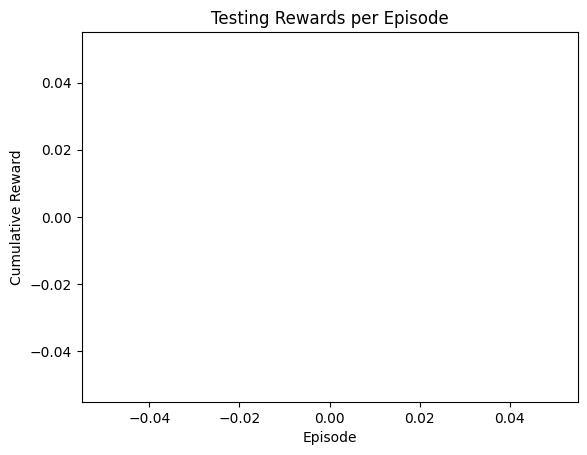

0.0 %
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] (108,)

Validation done... total reward= 11
[1 0 1 2 2 2 0 2 0 0 1 1 1 0 2 0 2 2 0 1 2]
[1 2 1 2 2 0 0 1 2 2 1 1 1 2 0 0 0 0 0 1 2]
Confusion Matrix:
 [[3 0 4]
 [0 6 1]
 [4 0 3]]
Classification Report:
               precision    recall  f1-score   support

           0     0.4286    0.4286    0.4286         7
           1     1.0000    0.8571    0.9231         7
           2     0.3750    0.4286    0.4000         7

    accuracy                         0.5714        21
   macro avg     0.6012    0.5714    0.5839        21
weighted avg     0.6012    0.5714    0.5839        21

Validation done...
Accuracy: 57.14%
F1 Score: 58.39%
Precision: 60.12%
Recall: 57.14%
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

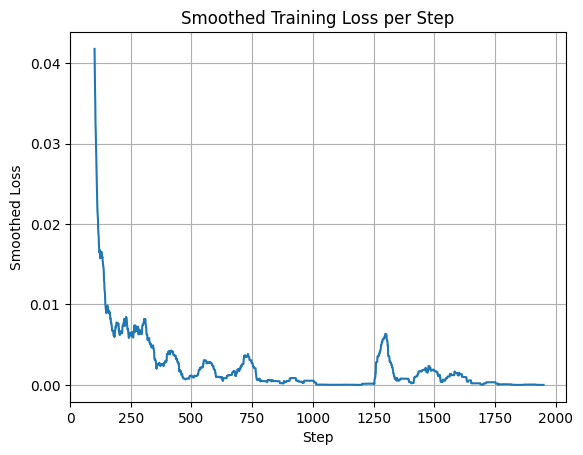

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.21208341, 0.21227753, 0.21303384, 0.21299012, 0.21232145, 0.2124579, 0.21309884, 0.21345958, 0.21420519, 0.2140427, 0.21382022, 0.21395716, 0.21413966, 0.21479726, 0.2153314, 0.214782, 0.21469101, 0.21533199, 0.21514644, 0.21574911, 0.21576203, 0.21561272, 0.21590178, 0.2157429, 0.21617065, 0.21717465, 0.21818766, 0.21816927, 0.2182986, 0.21842551, 0.21821386, 0.21830404, 0.21783045, 0.21729238, 0.21696846, 0.21775135, 0.21741527, 0.21739352, 0.21688607, 0.21746056, 0.21856639, 0.2184080

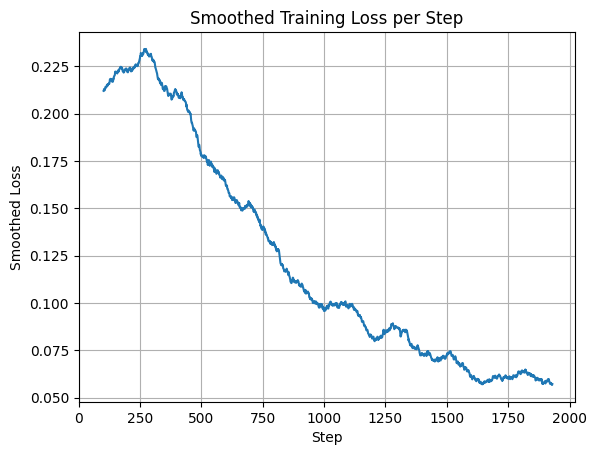

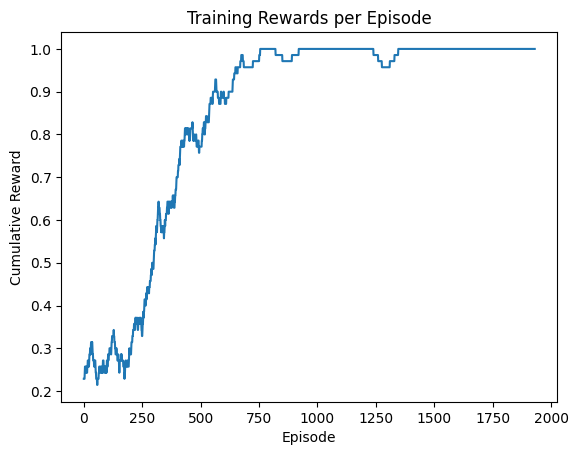

___________________________________________________________________________________________________________________________


In [353]:
rwd = RewardHistory()
scores = dqn.test(env=Plasticity(dataset=(ftr2,label_array),random=True), nb_episodes=1, visualize=False, callbacks=[rwd],verbose=0)
print(np.mean(scores.history['episode_reward'])*100,'%')
plt.plot(scores.history['episode_reward'])
plt.title('Testing Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()
print(np.mean(scores.history['episode_reward'])*100,'%')
print(label_array,label_array.shape)

dqn_eval(dqn,d=(X_test,y_test))
def moving_average(data, window_size):
    return [np.mean(data[i:i+window_size]) for i in range(len(data) - window_size + 1)]
losses = loss_history.losses
losses2 = loss_history2.losses
smoothed_losses = moving_average(losses, window_size=50)  
print(smoothed_losses)
plt.plot(smoothed_losses)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

smoothed_losses2 = moving_average(losses2, window_size=70)  
print(smoothed_losses2)
plt.plot(smoothed_losses2)
plt.title('Smoothed Training Loss per Step')
plt.xlabel('Step')
plt.xlim(left=0)
plt.ylabel('Smoothed Loss')
plt.grid(True)
plt.show()

plt.plot(moving_average(reward_history.rewards, window_size=70))
plt.title('Training Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

print("___________________________________________________________________________________________________________________________")

In [354]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Example true and predicted values
print(y_predFull)
print(y_trueest)

# Generate confusion matrix
cm = confusion_matrix(y_trueest, y_predFull)

# Extracting TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculating precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Calculating F1 score
F1 = 2 * (precision * recall) / (precision + recall)

print("F1 Score:", F1)
print("Precision: ", precision)
print("Recall: ", recall)


NameError: name 'y_predFull' is not defined